In [1]:
! rm -rf tools_classifier
! git clone https://github.com/zRafaF/tools_classifier

Cloning into 'tools_classifier'...
remote: Enumerating objects: 471, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 471 (delta 0), reused 124 (delta 0), pack-reused 343 (from 1)
Receiving objects: 100% (471/471), 150.59 MiB | 21.20 MiB/s, done.
Resolving deltas: 100% (22/22), done.
Updating files: 100% (546/546), done.


In [41]:
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import os
from skimage import io

In [10]:
DATA_SET_PATH = './tools_classifier/data_set/c_r_g_png'
NORMALIZED_DATA_SET_PATH = './tools_classifier/data_set/c_r_a_g_n_png'

In [49]:
test_img = io.imread(os.path.join(DATA_SET_PATH, "clamp", "1-01-V1-W.png"))
equalized_test_img = io.imread(os.path.join(NORMALIZED_DATA_SET_PATH, "clamp", "1-01-V1-W.png"))

# Segmentação via [Chan Vese](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_chan_vese.html)

In [59]:
from skimage.segmentation import chan_vese

def mask_chan_vese(img):
  gray_image = rgb2gray(img)
  chan_vese_img = chan_vese(
      gray_image,
      mu=0.25,
      lambda1=1,
      lambda2=1,
      tol=1e-3,
      max_num_iter=60,
      dt=0.5,
      init_level_set="checkerboard",
      extended_output=True,
    )
  fig, axes = plt.subplots(1, 3, figsize=(10, 10))
  ax = axes.flatten()

  # Plotting the original image
  ax[0].imshow(gray_image, cmap="gray")
  ax[0].set_title("Original Image")

  # Plotting the segmented - 100 iterations image
  ax[1].imshow(chan_vese_img[0], cmap="gray")
  title = "Chan-Vese segmentation - {} iterations".format(len(chan_vese_img[2]))

  ax[1].set_title(title)

  # Plotting the final level set
  ax[2].imshow(chan_vese_img[1], cmap="gray")
  ax[2].set_title("Final Level Set")
  plt.show()



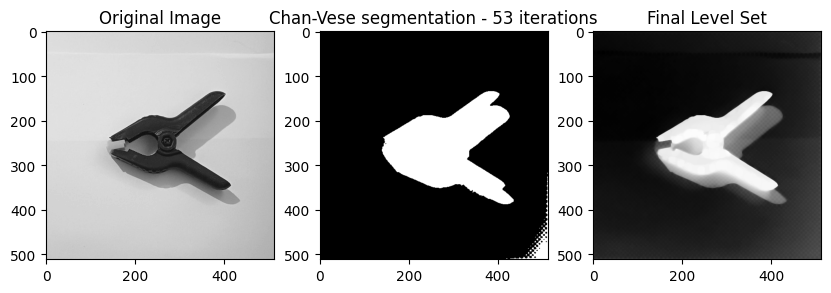

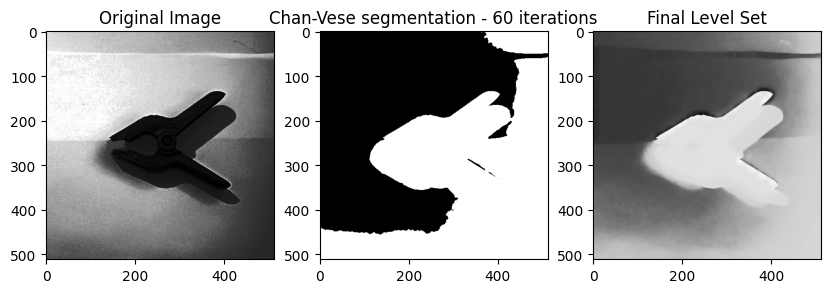

In [60]:
mask_chan_vese(test_img)
mask_chan_vese(equalized_test_img)

In [52]:
def threshold_test(img):
  gray_image = rgb2gray(img)

  # Setting the plot size to 15,15
  plt.figure(figsize=(15, 15))

  for i in range(10):

    # Iterating different thresholds
    binarized_gray = (gray_image > i*0.1)*1
    plt.subplot(5,2,i+1)

    # Rounding of the threshold
    # value to 1 decimal point
    plt.title("Threshold: >"+str(round(i*0.1,1)))

    # Displaying the binarized image
    # of various thresholds
    plt.imshow(binarized_gray, cmap = 'gray')

  plt.tight_layout()

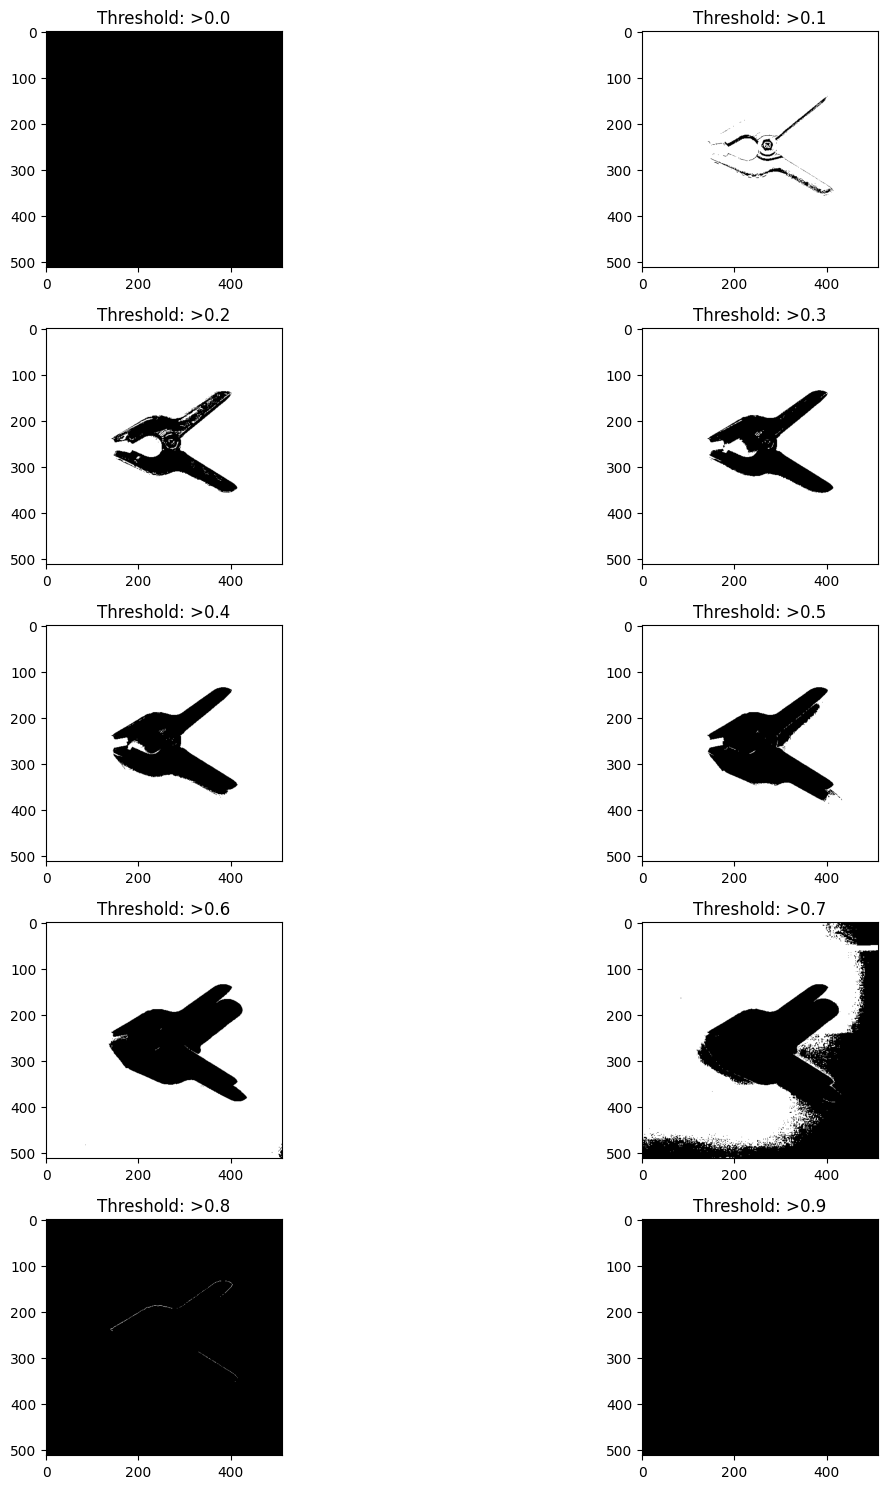

In [56]:
threshold_test(test_img)

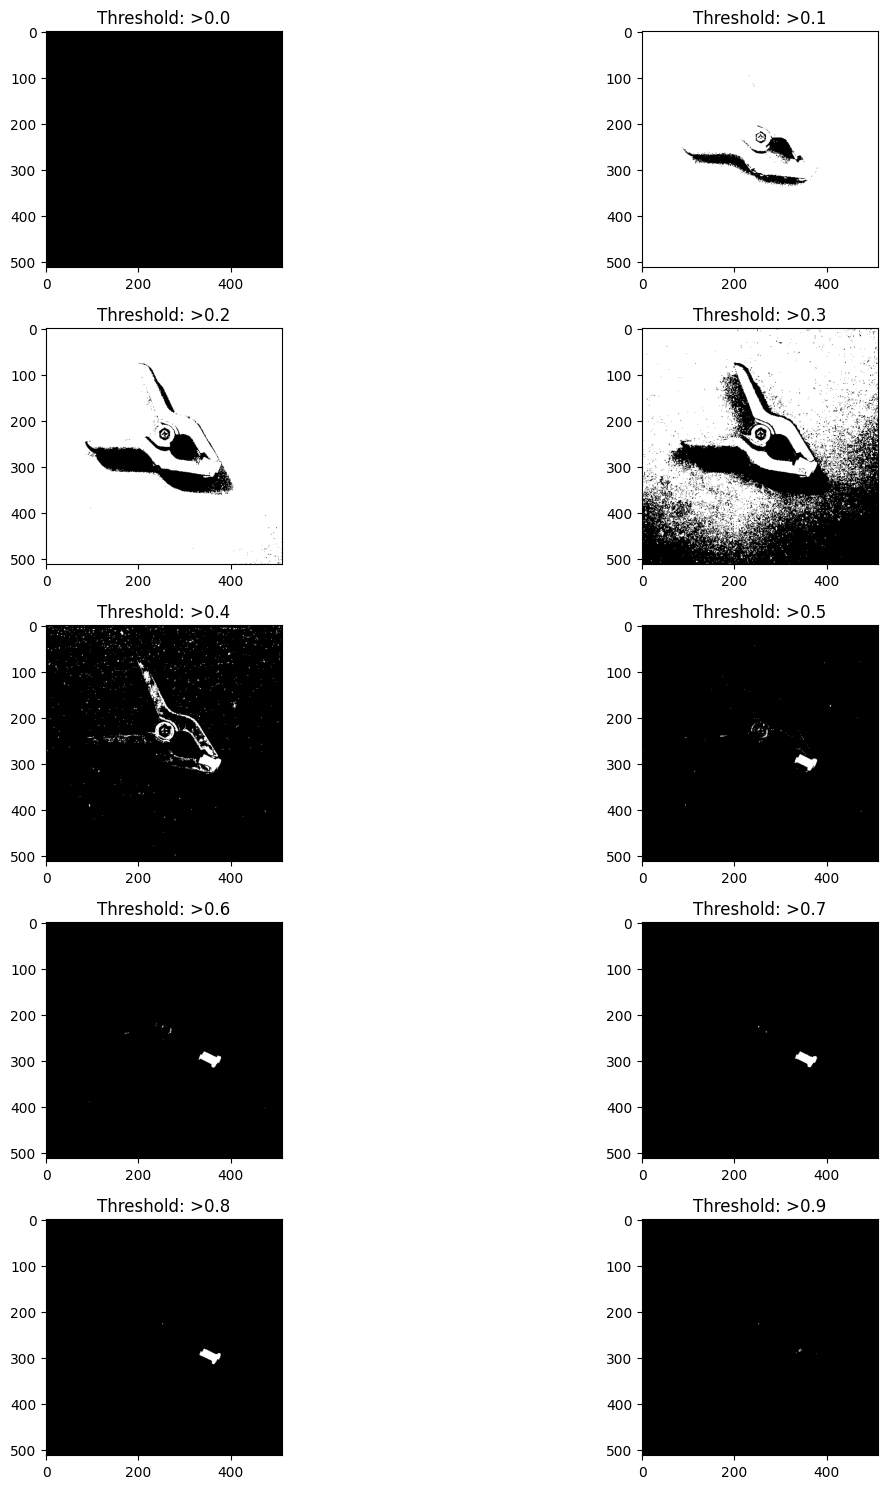

In [23]:
threshold_test(test_img)

In [14]:
def images_loader(data_set_path):
  classes_dict = []
  for dir in os.listdir(data_set_path):
      images_dict = []
      data_set_dir = os.path.join(data_set_path, dir)
      for filename in os.listdir(data_set_dir):
        if filename.endswith('.png'):
            img_path = os.path.join(data_set_dir, filename)
            image = io.imread(img_path)
            splitted = filename.split(".")[0].split("-")

            current_dict = {
                "classid": splitted[0],
                "img_sequence": splitted[1],
                "V1|V2": splitted[2],
                "B|W": splitted[3],
                "filename": filename,
                "image": image
            }

            images_dict.append(current_dict)
      classes_dict.append({
          "class": dir,
          "images": images_dict
      })
  return classes_dict

<ipython-input-12-52b3ab7ced6b>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 15))


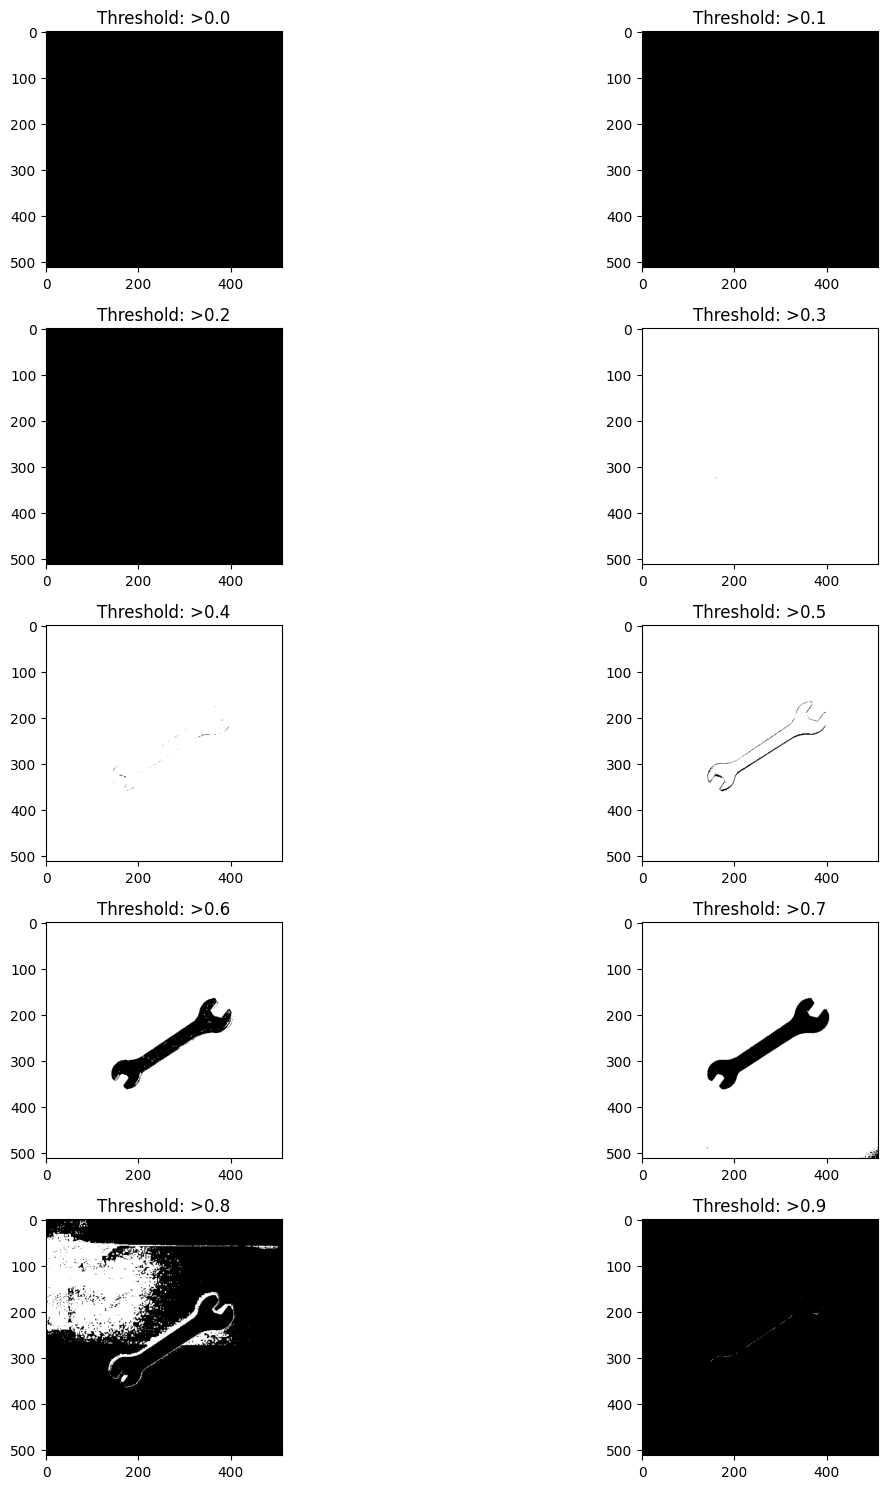

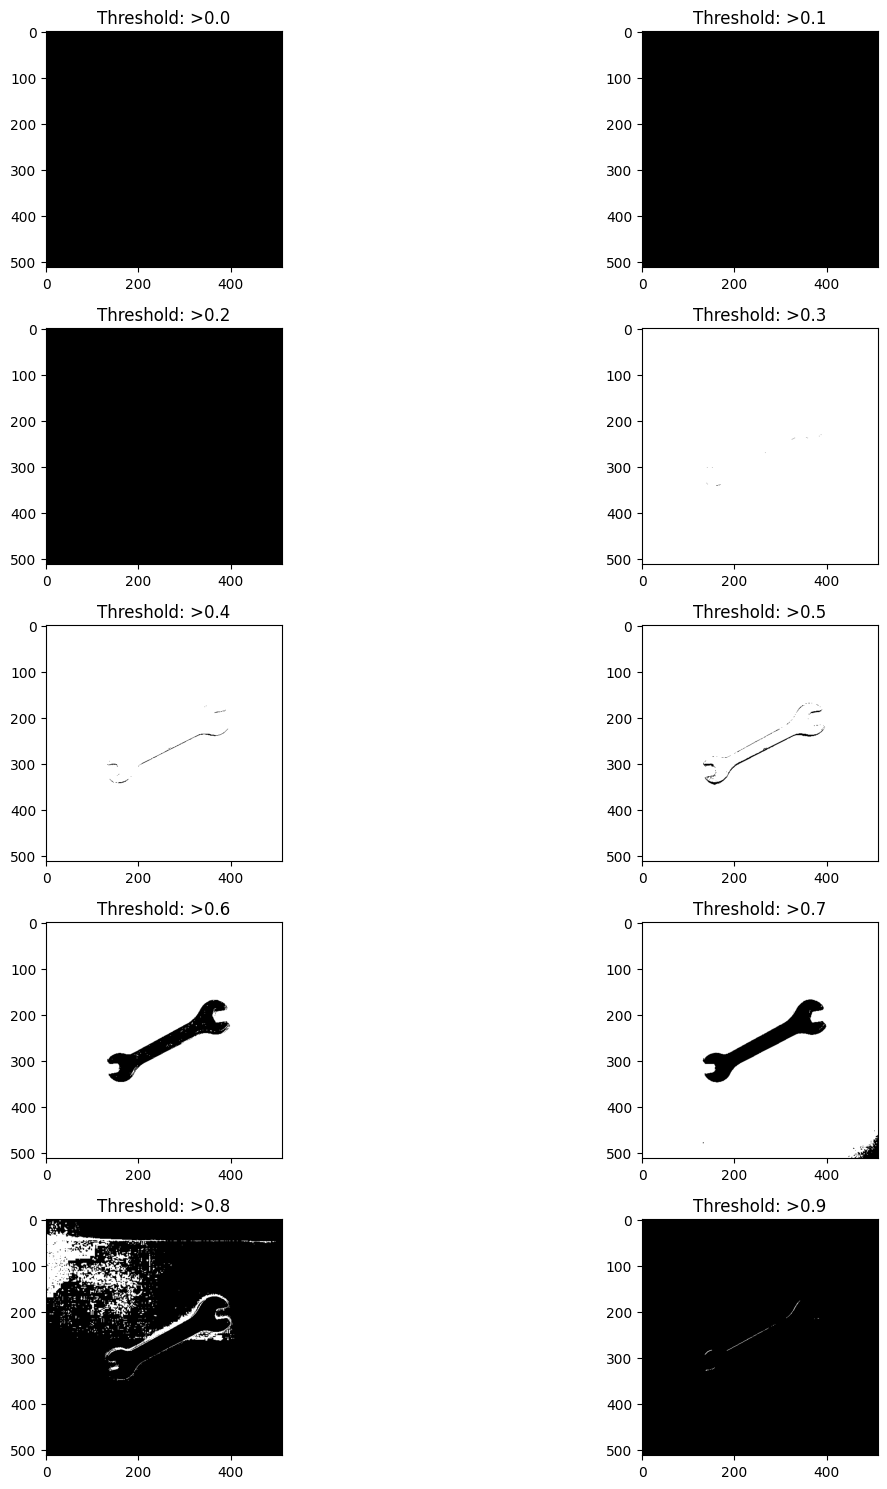

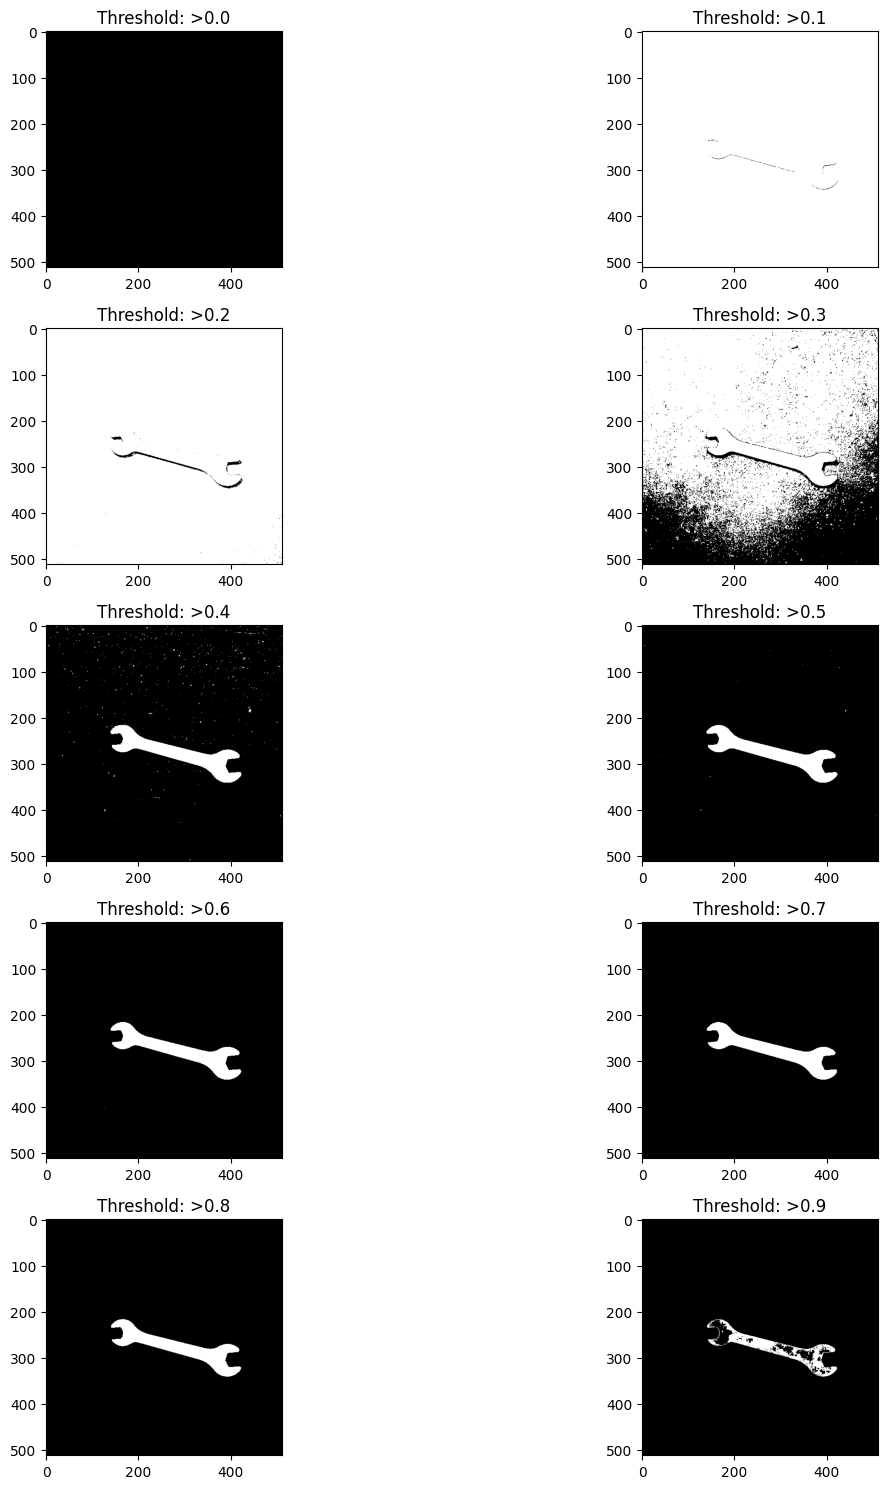

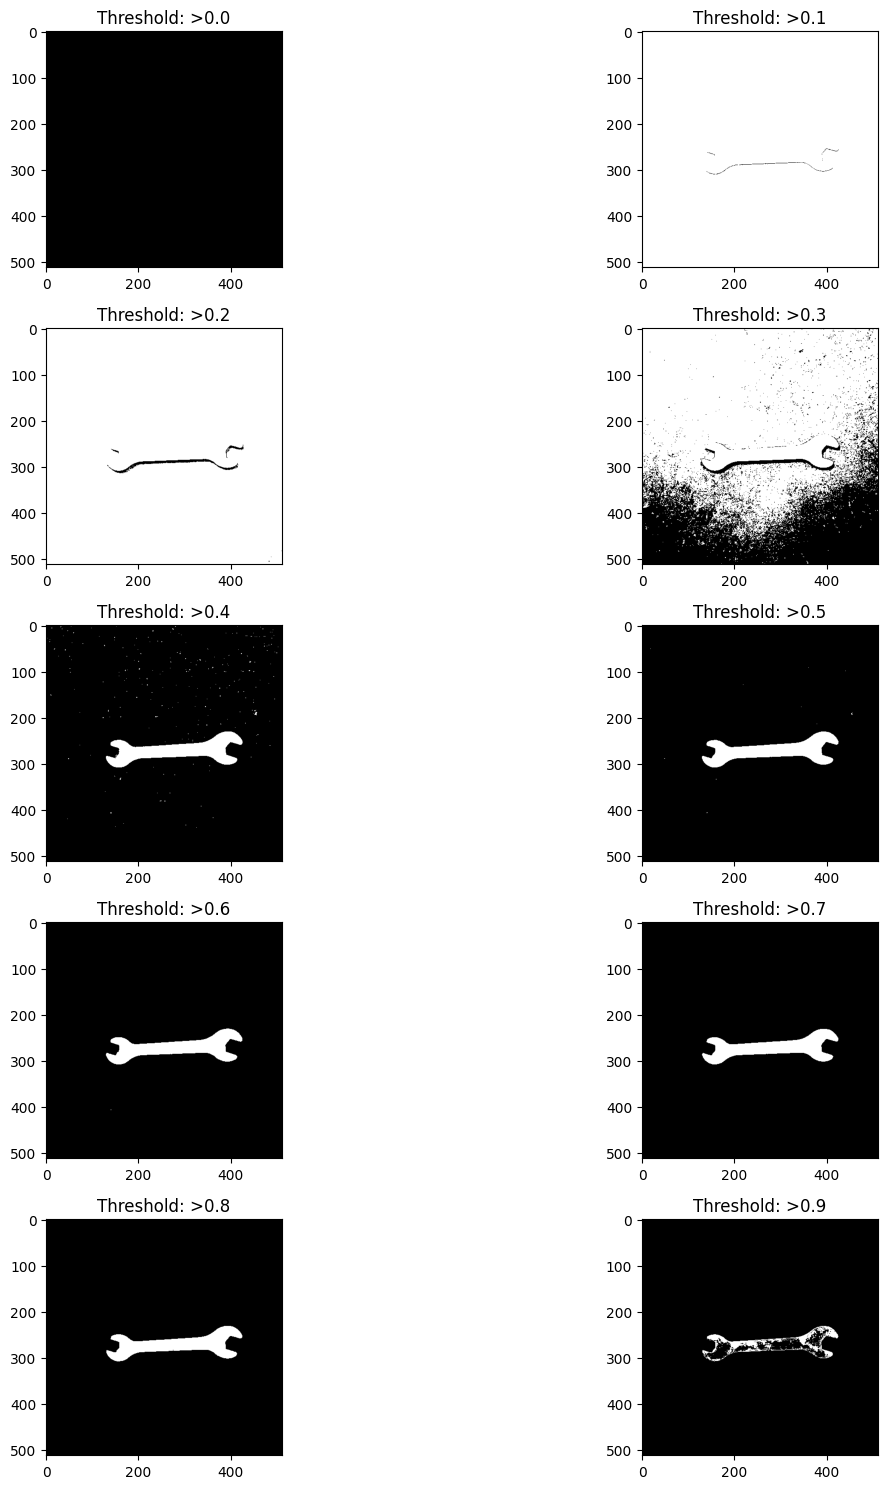

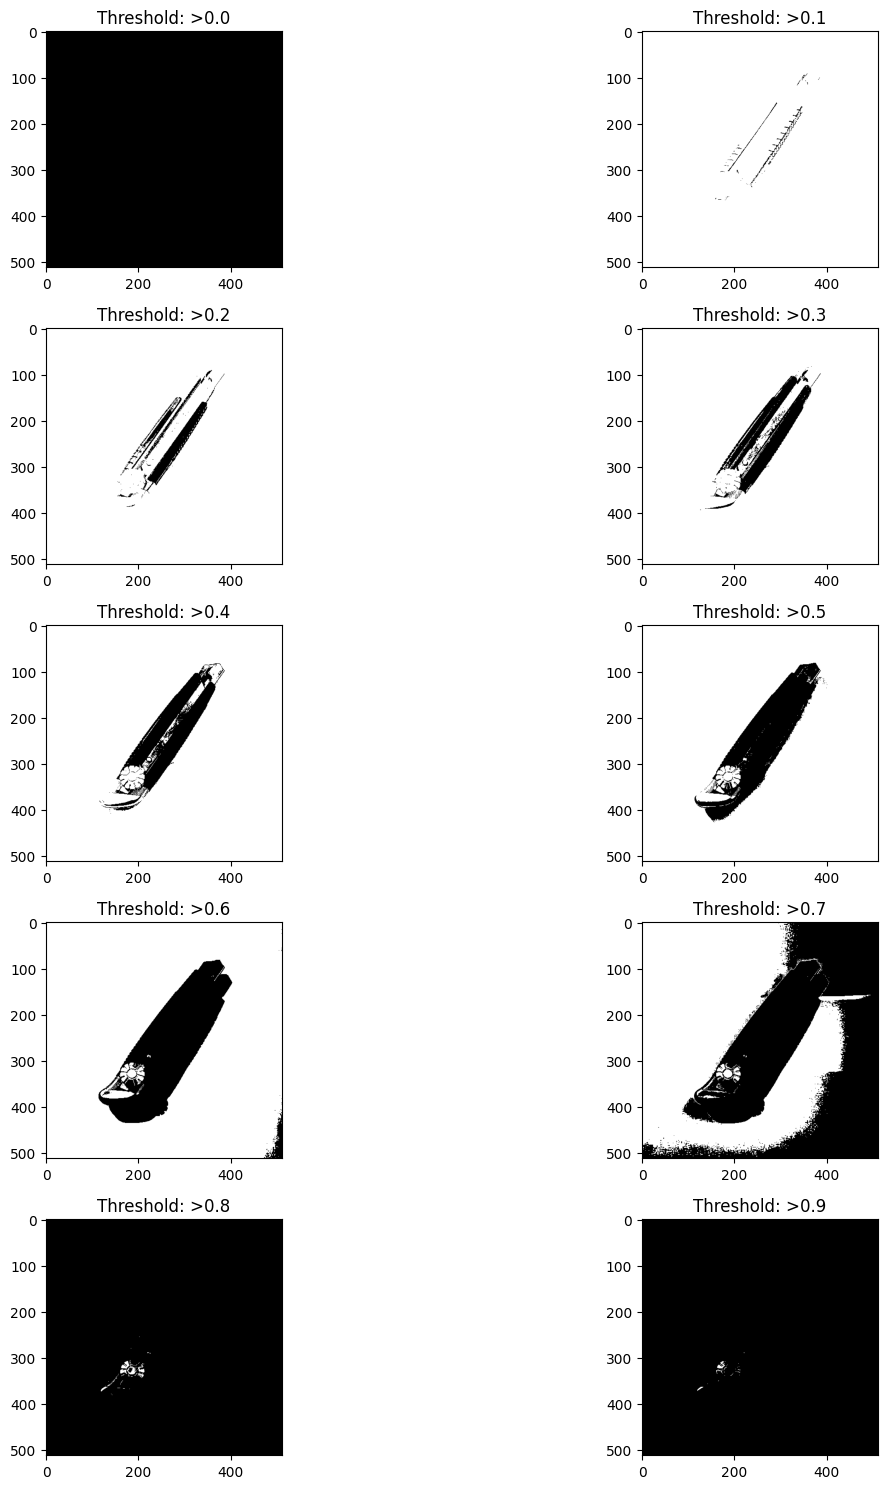

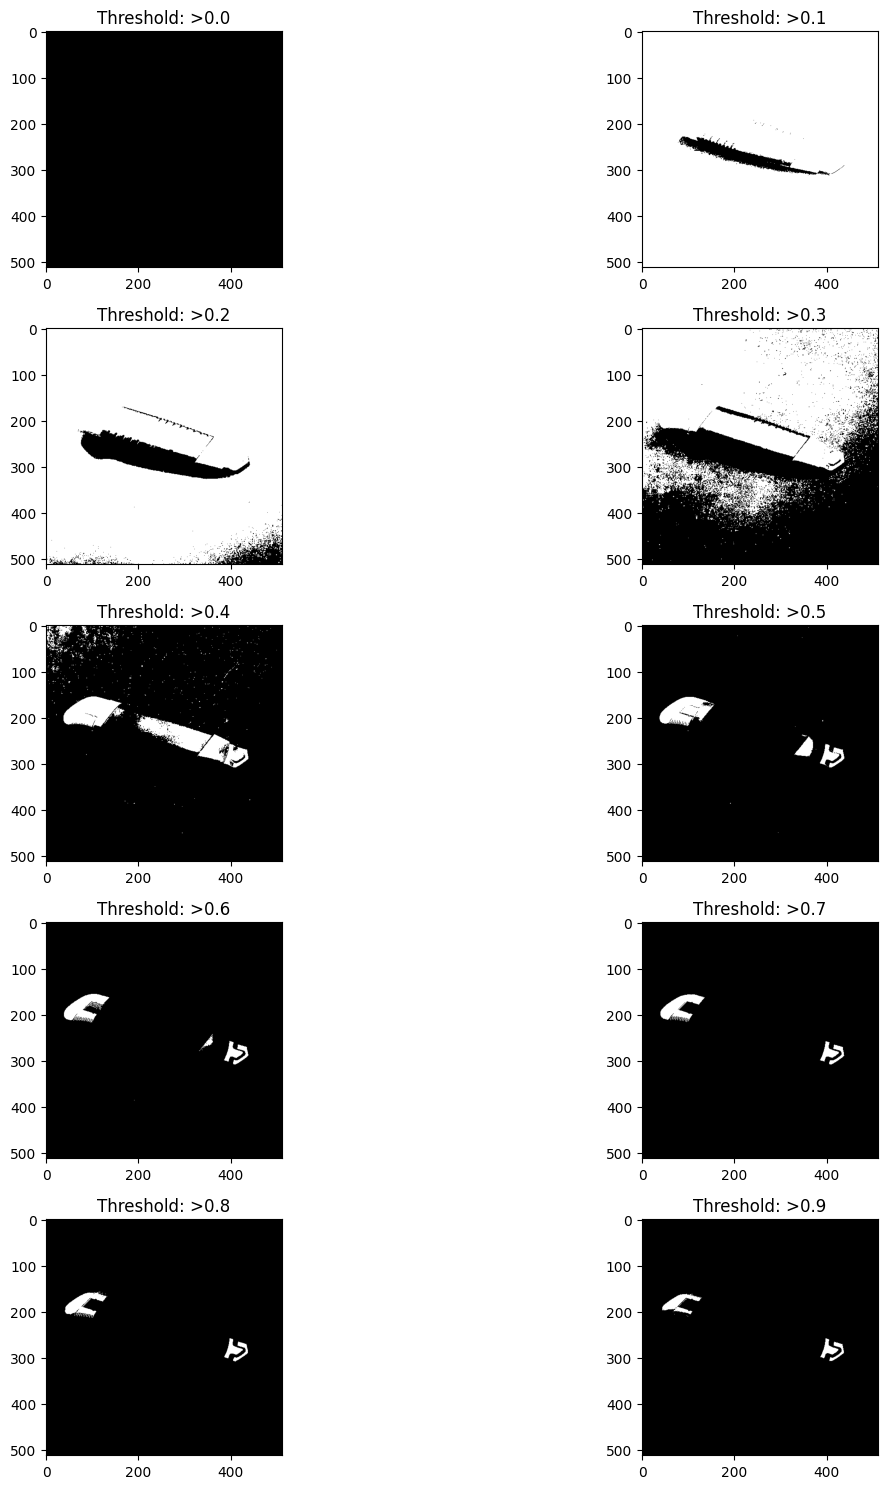

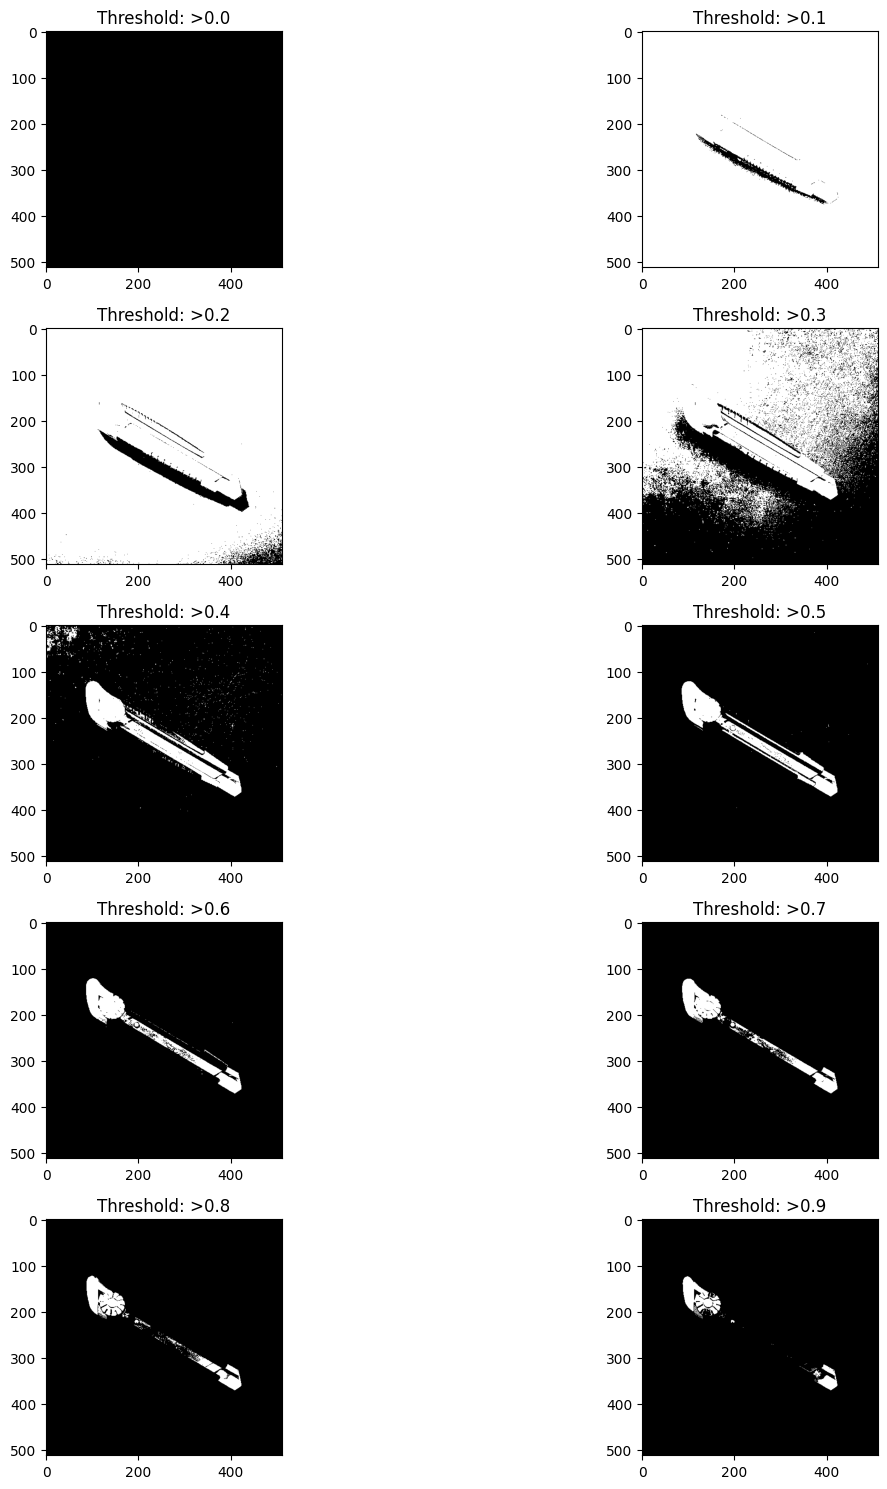

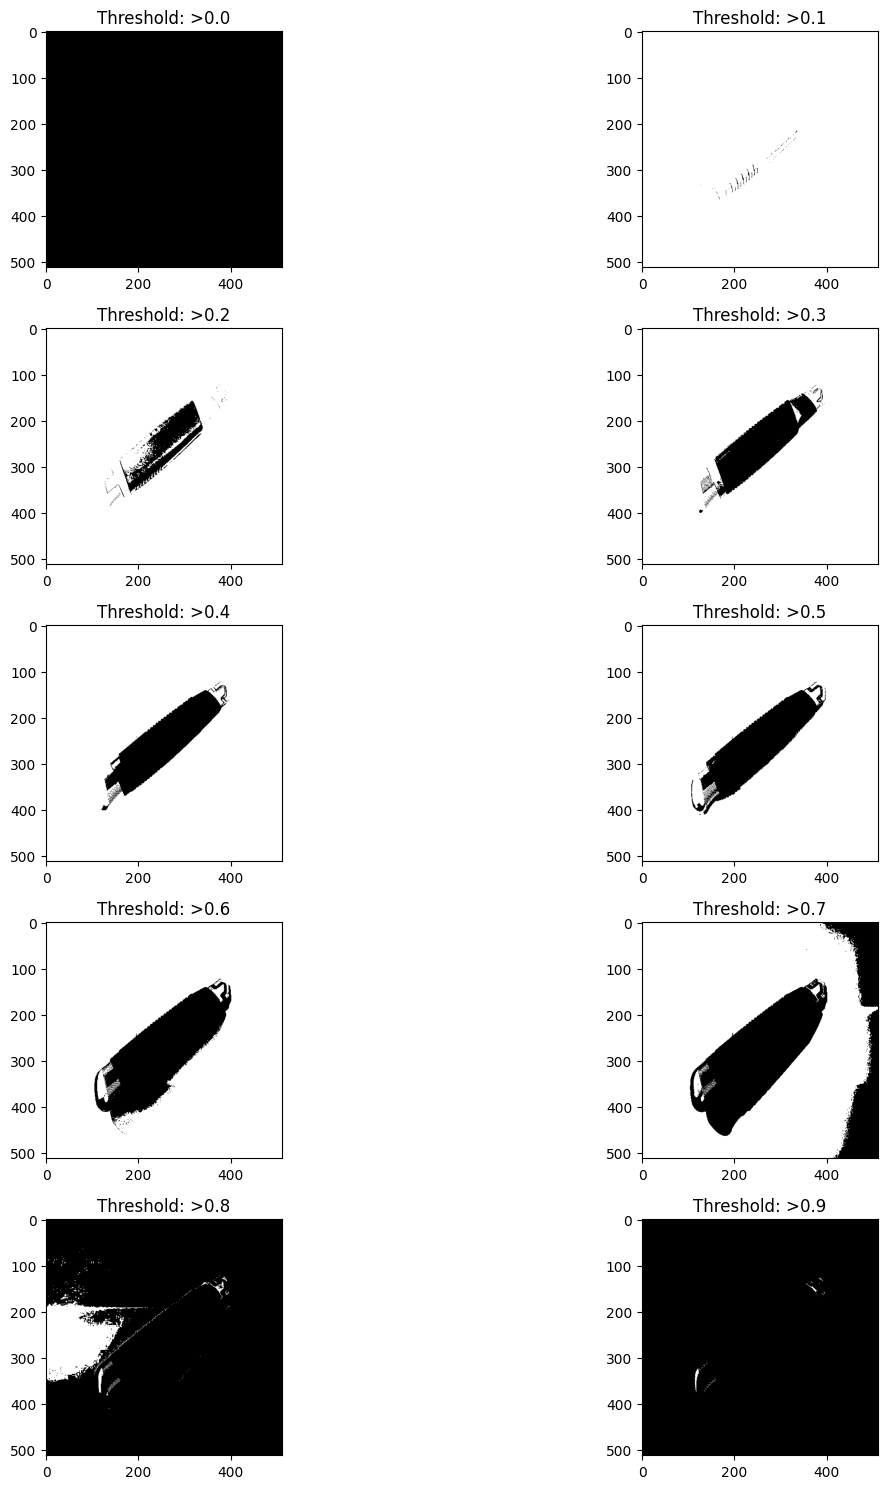

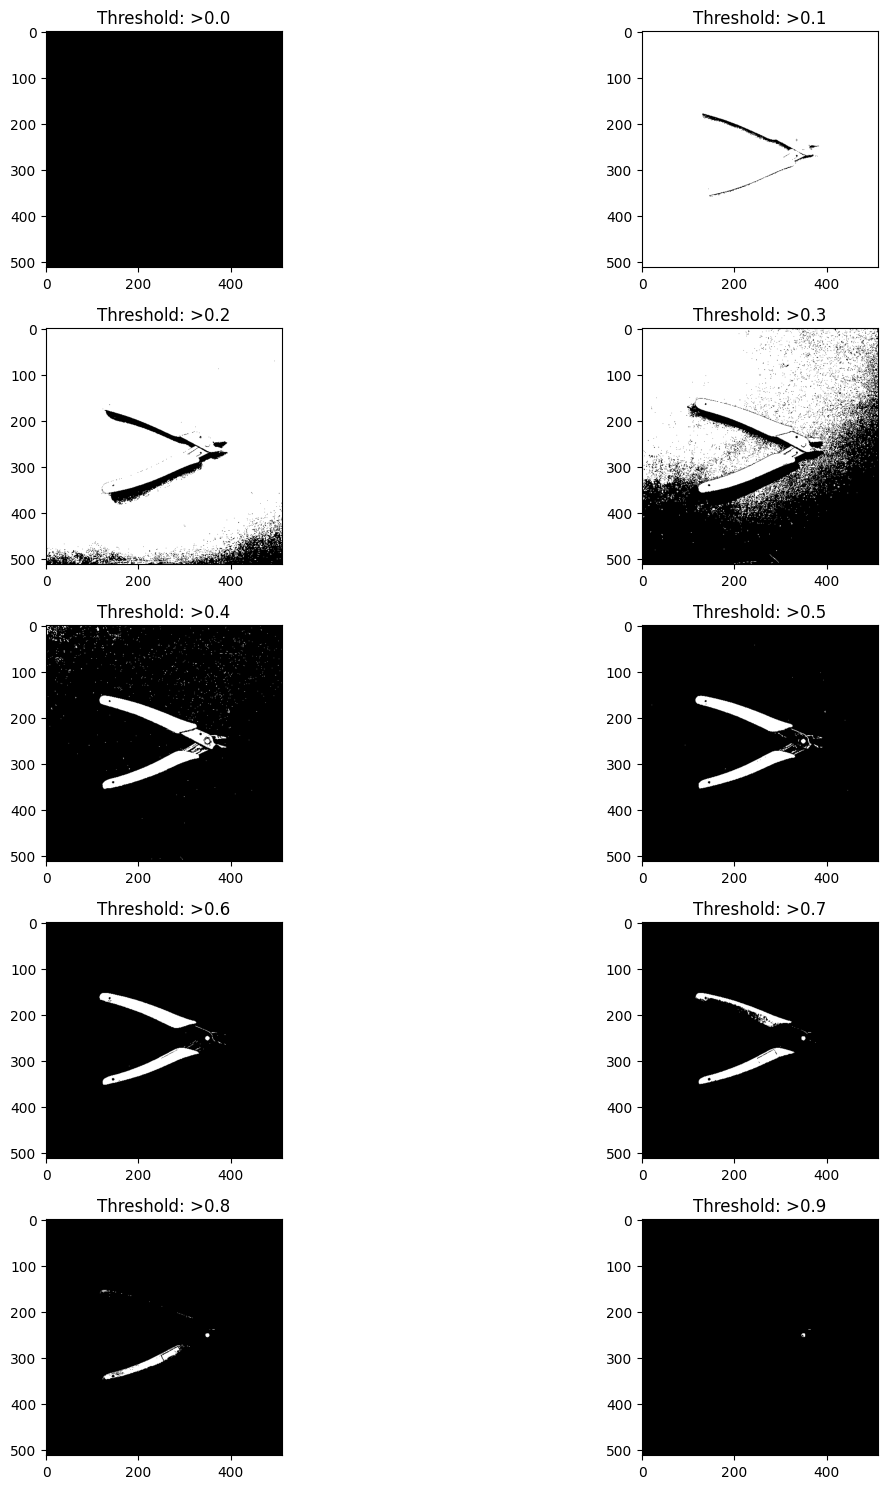

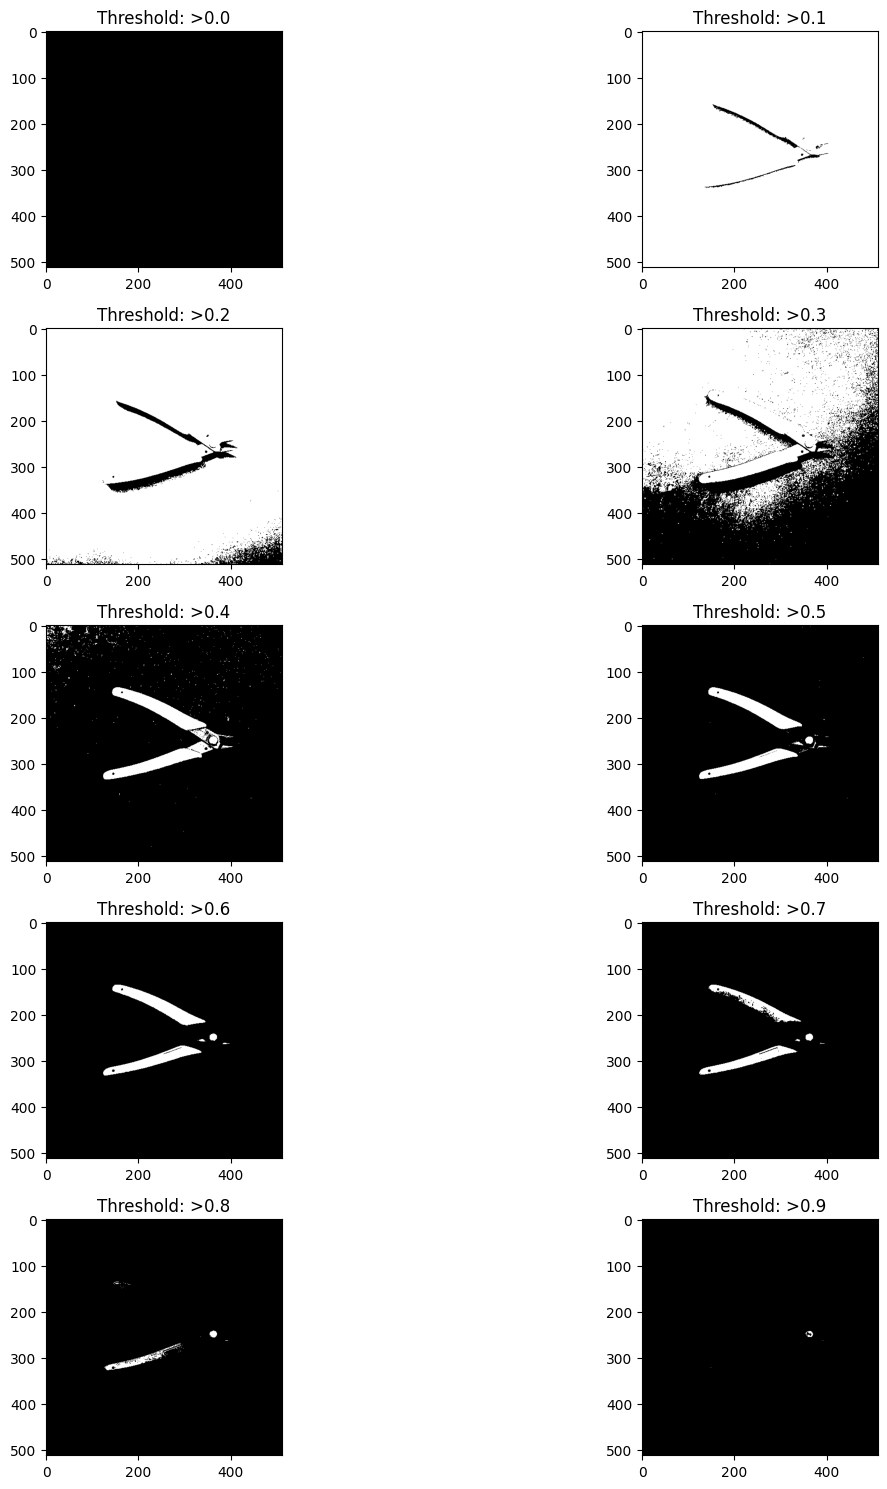

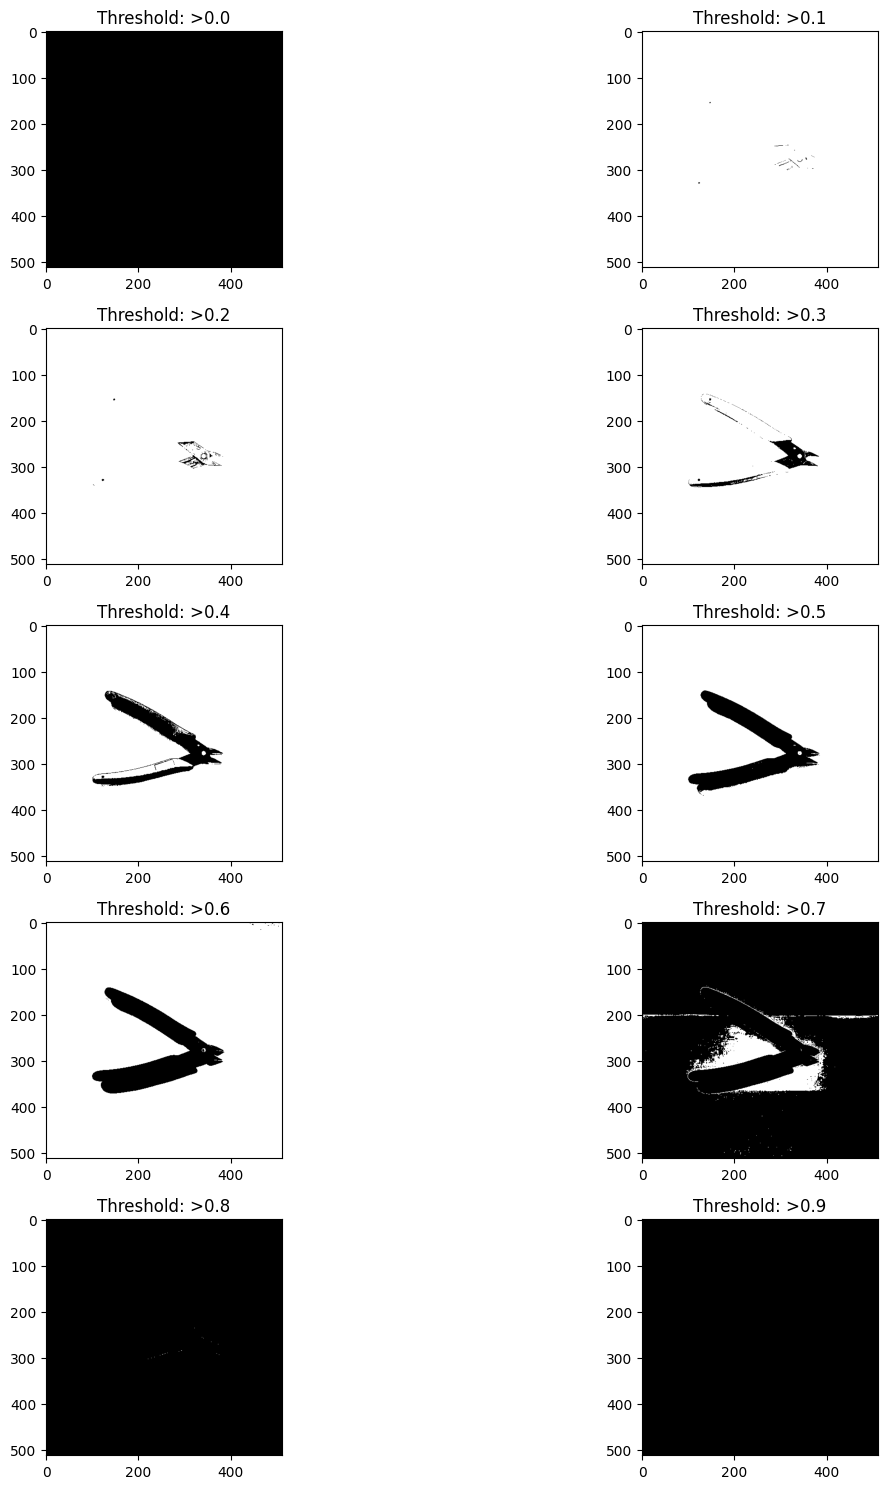

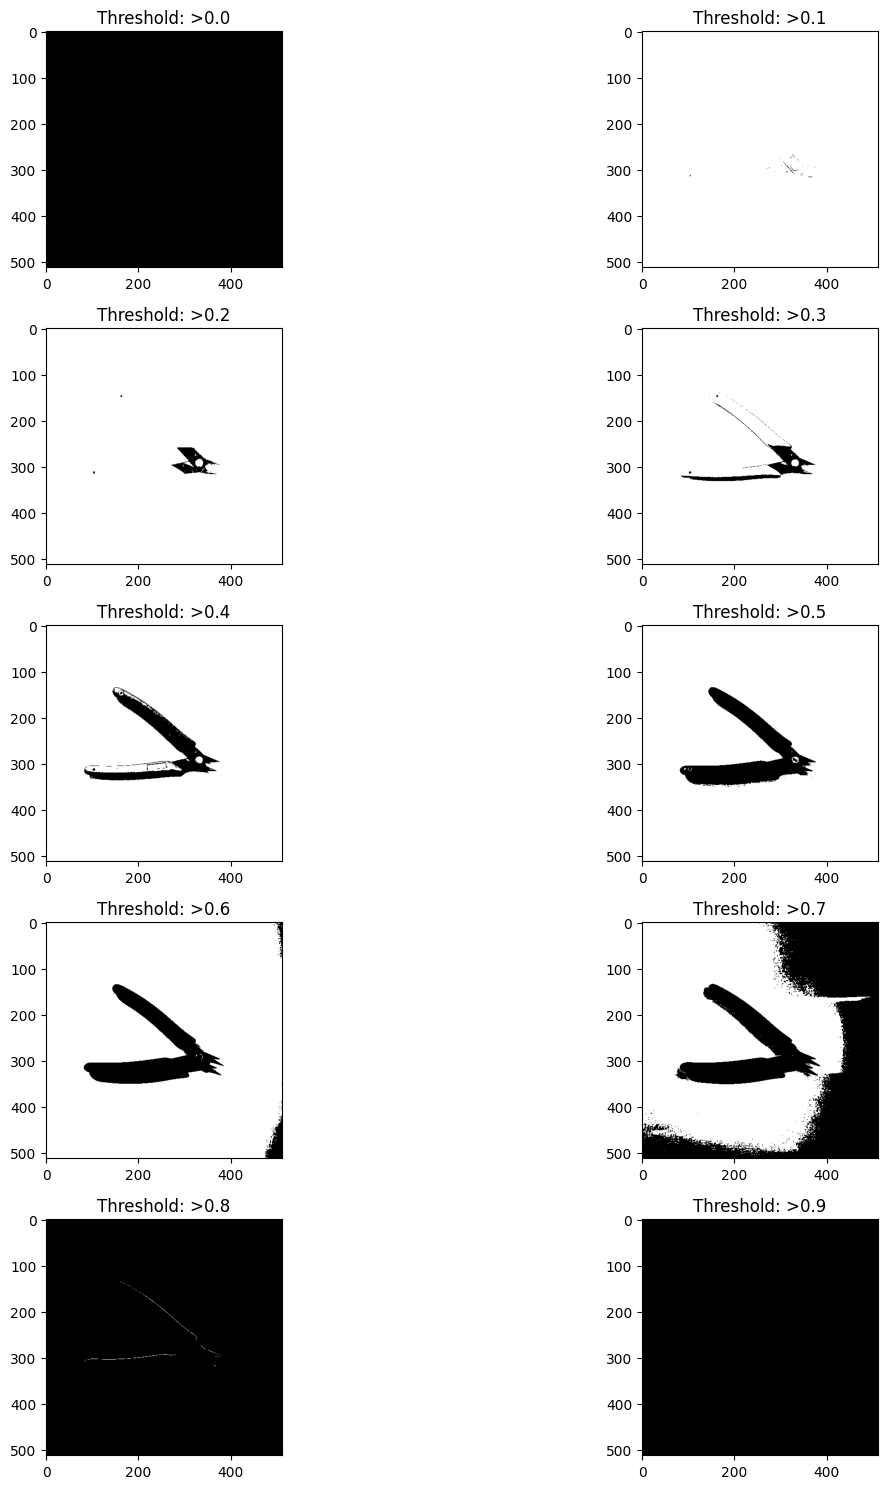

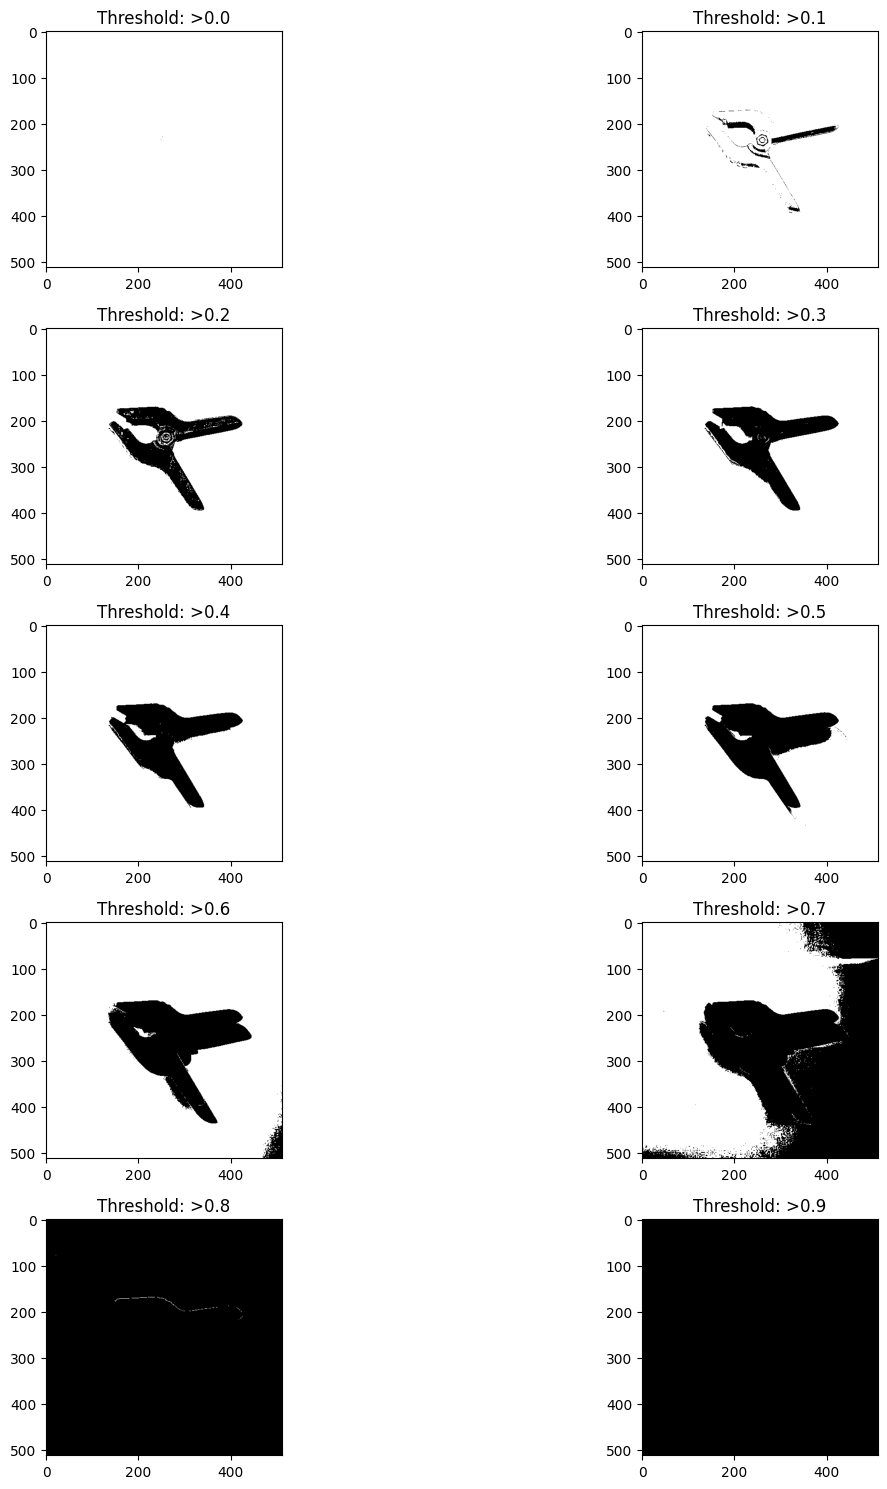

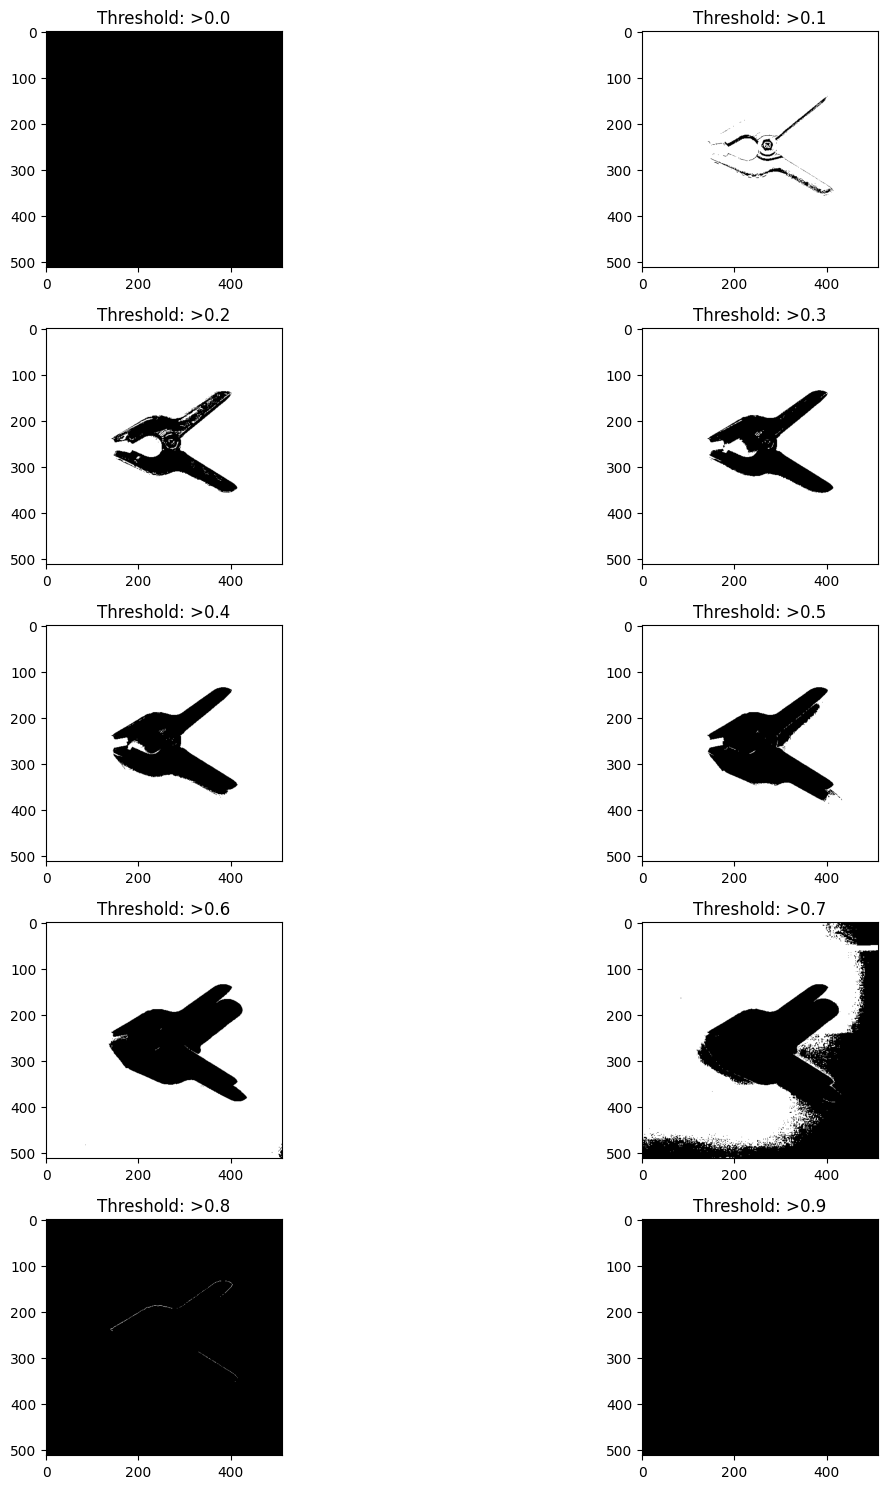

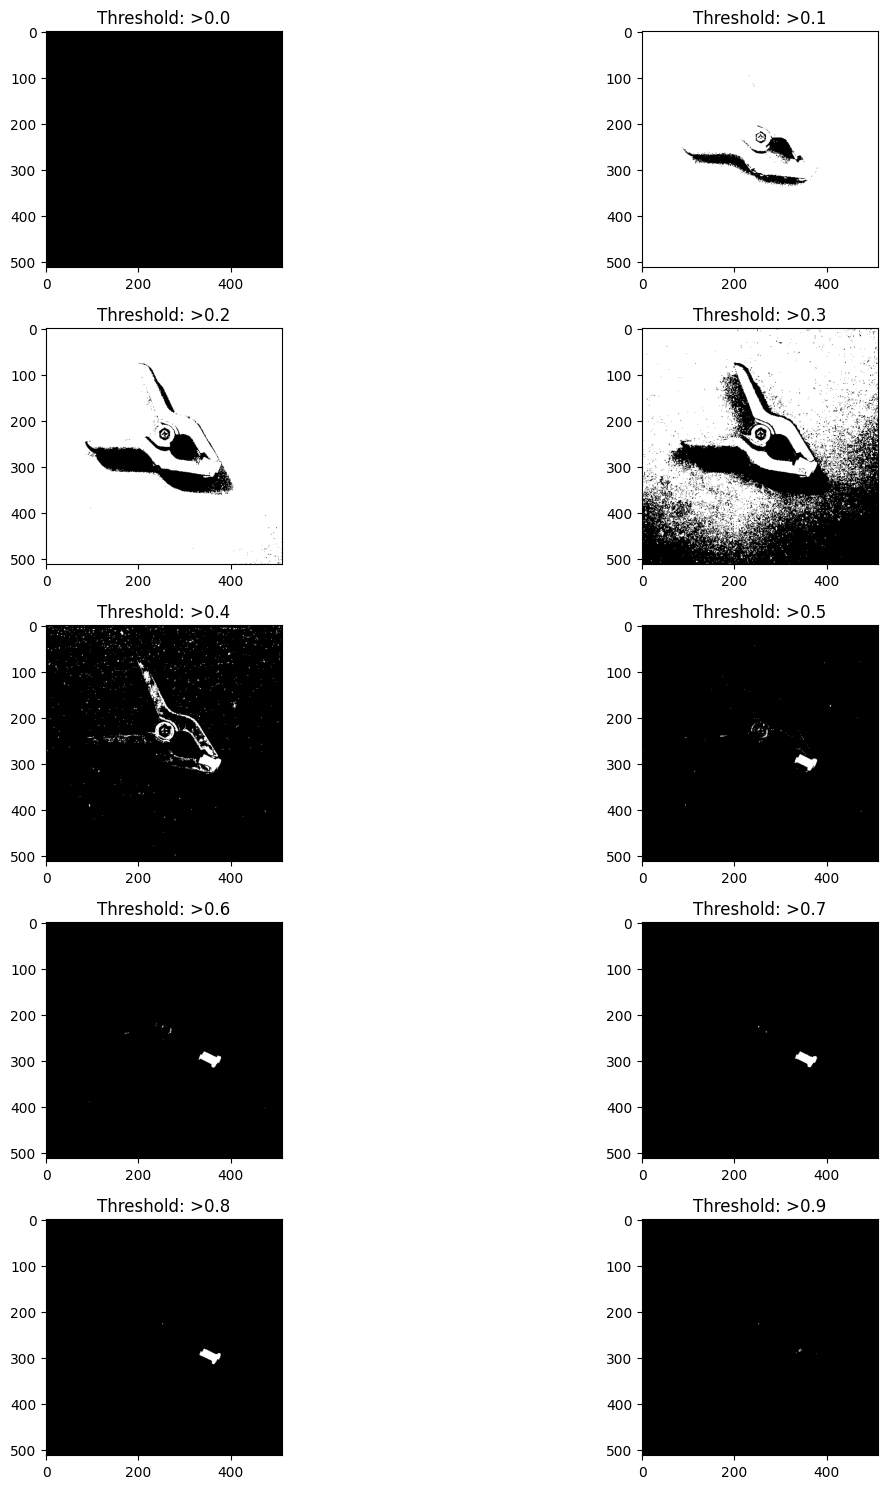

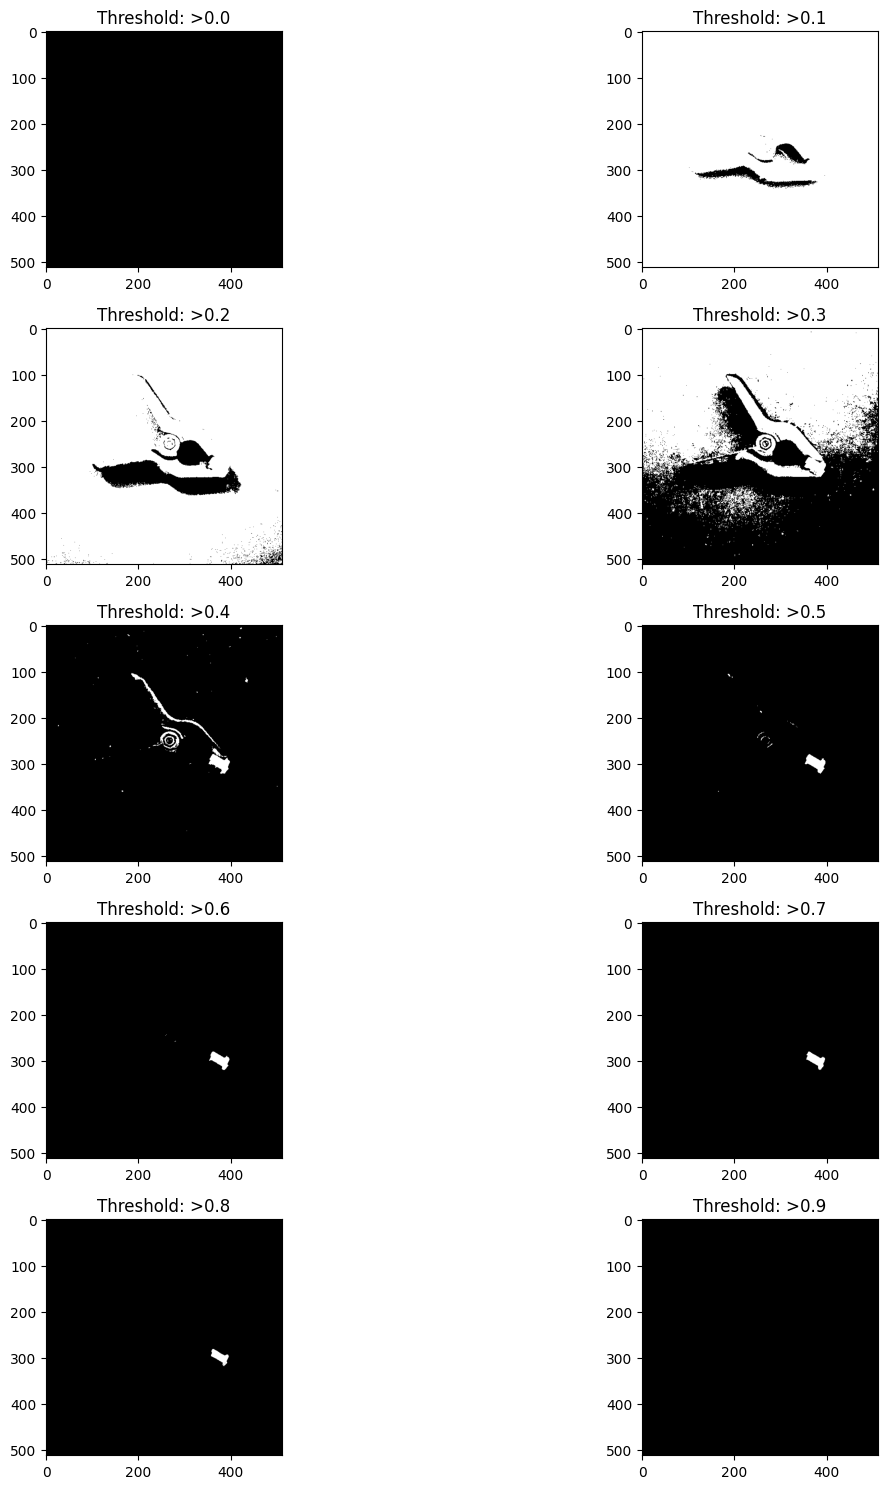

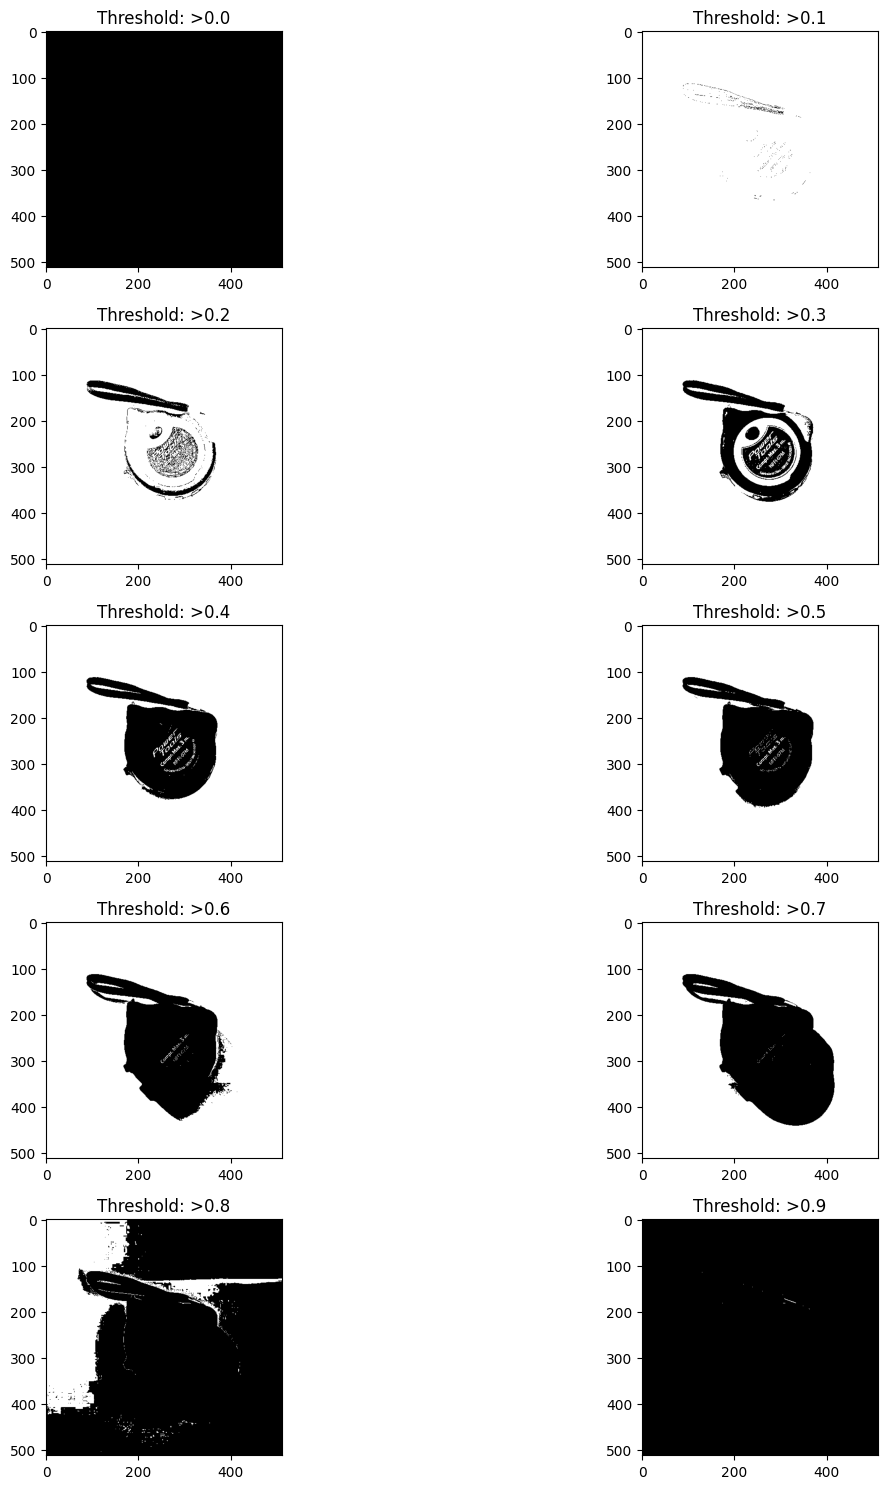

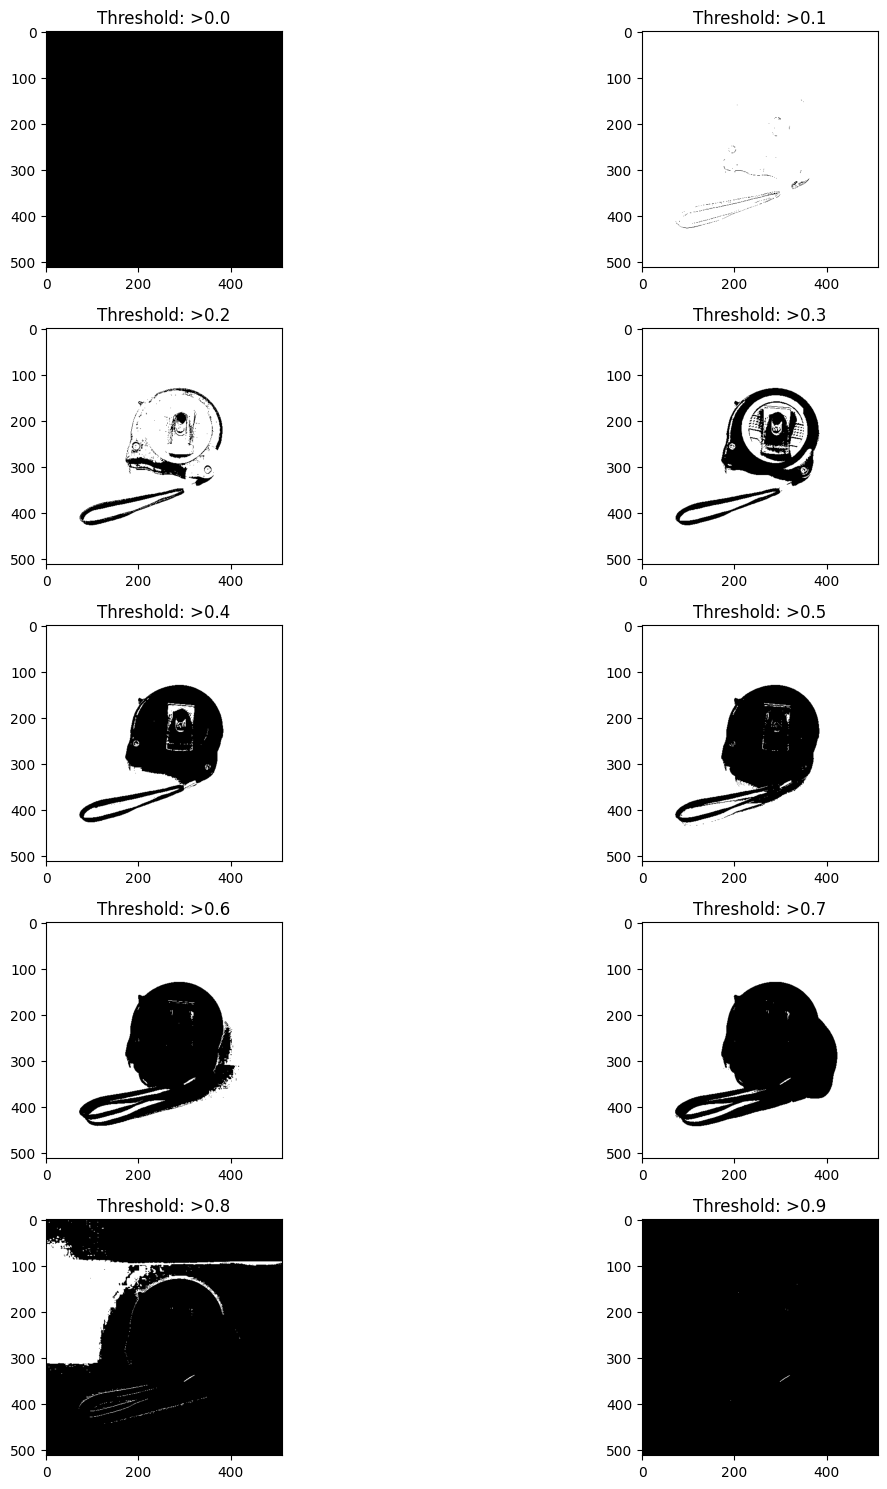

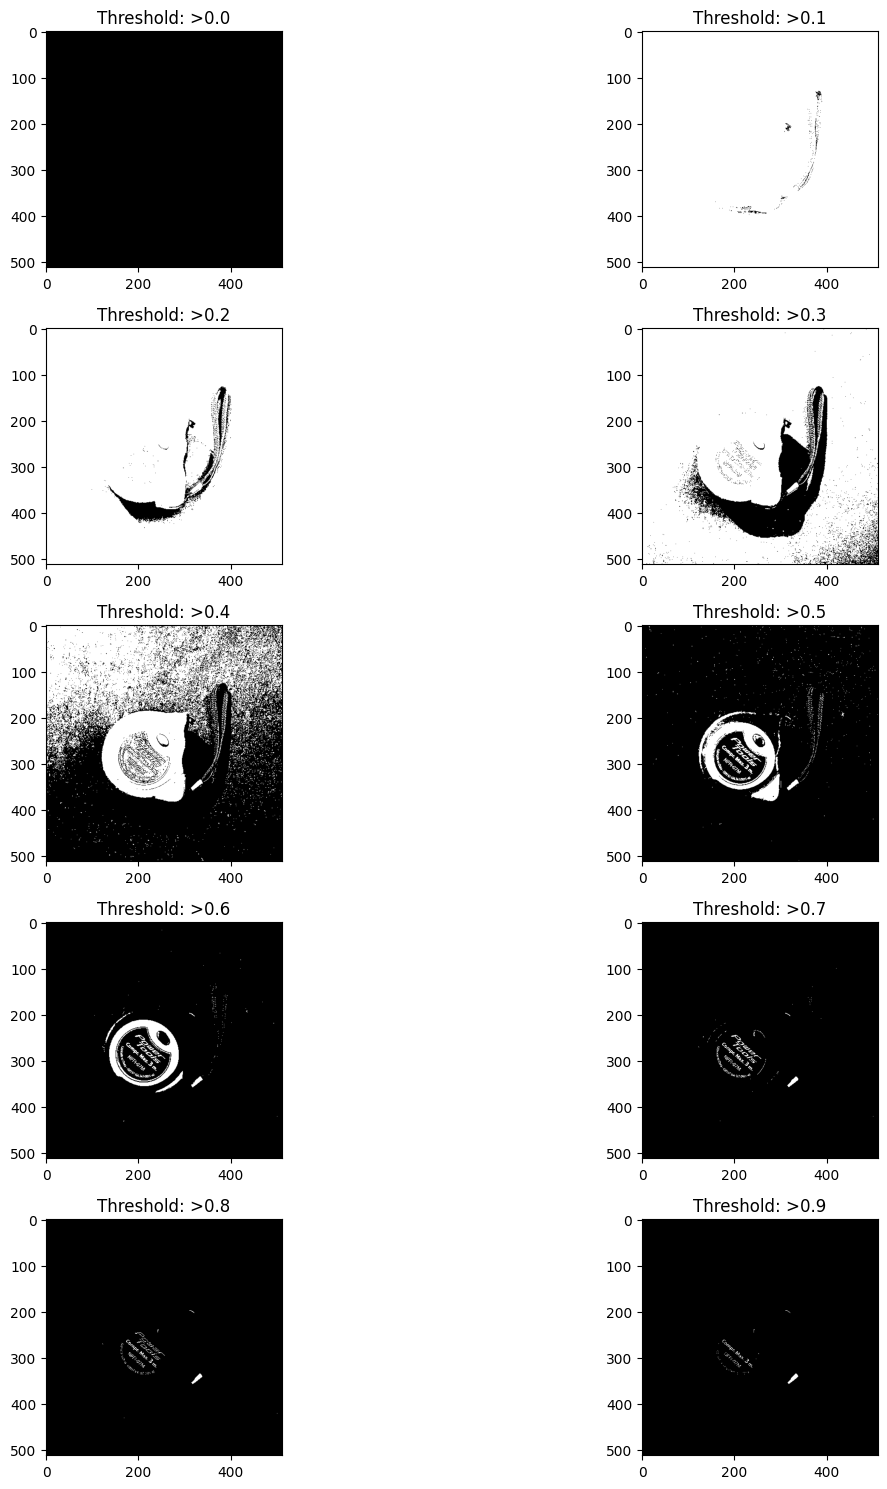

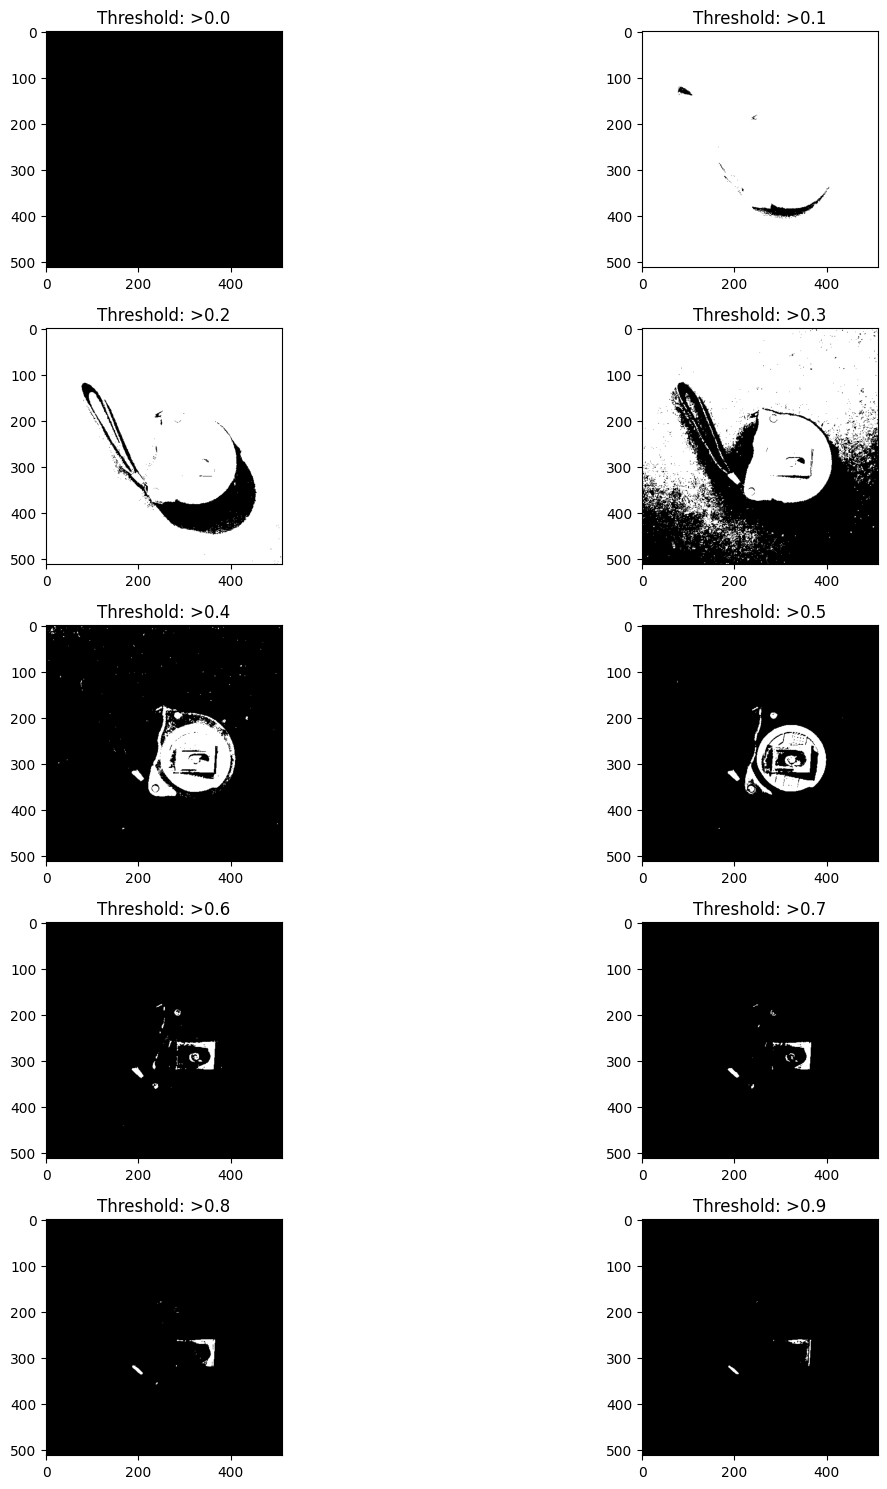

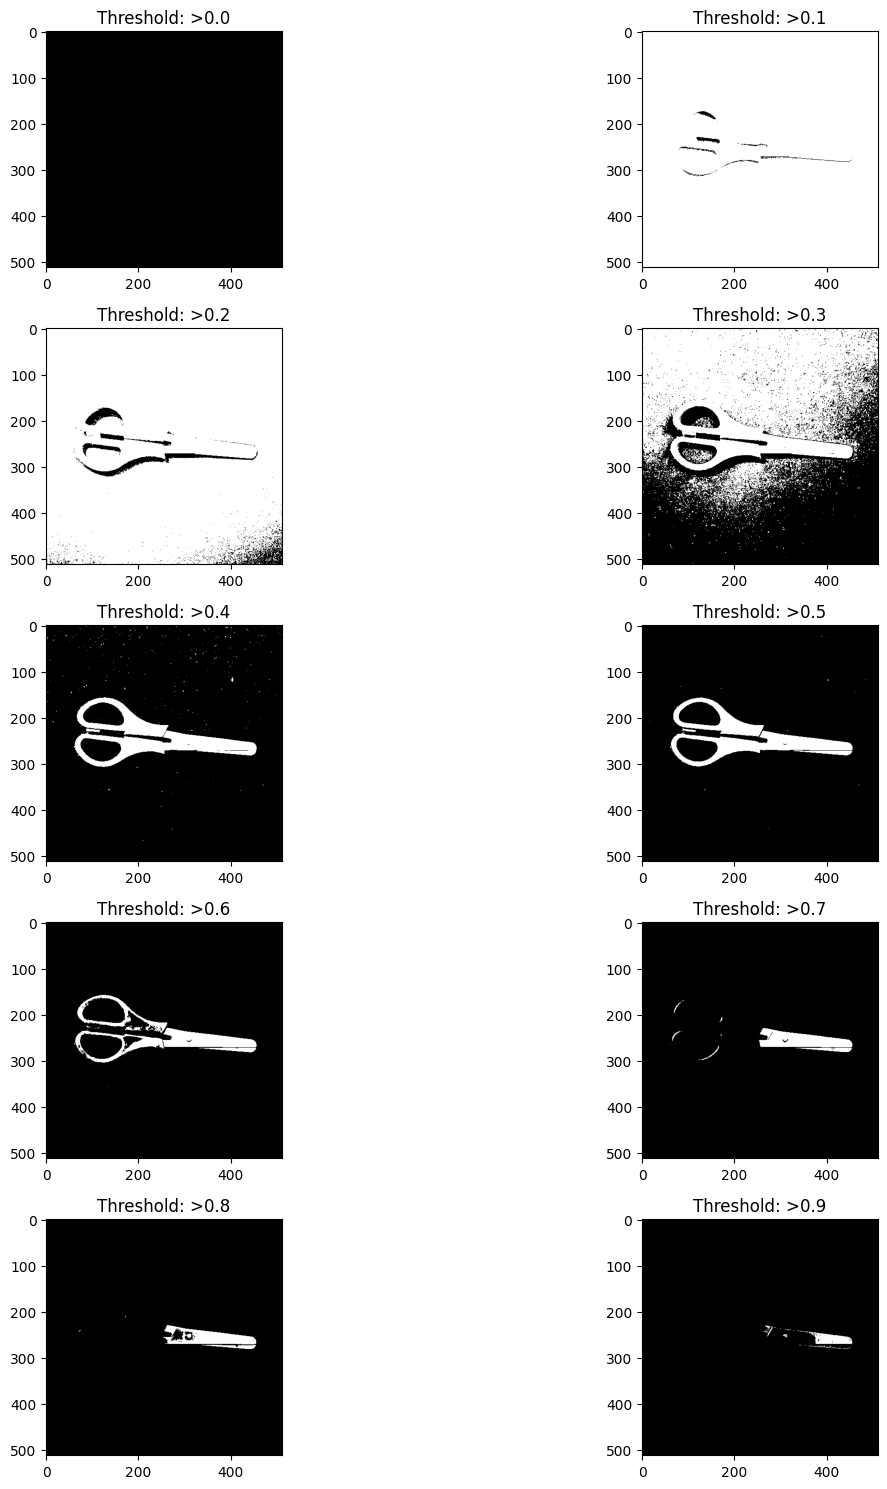

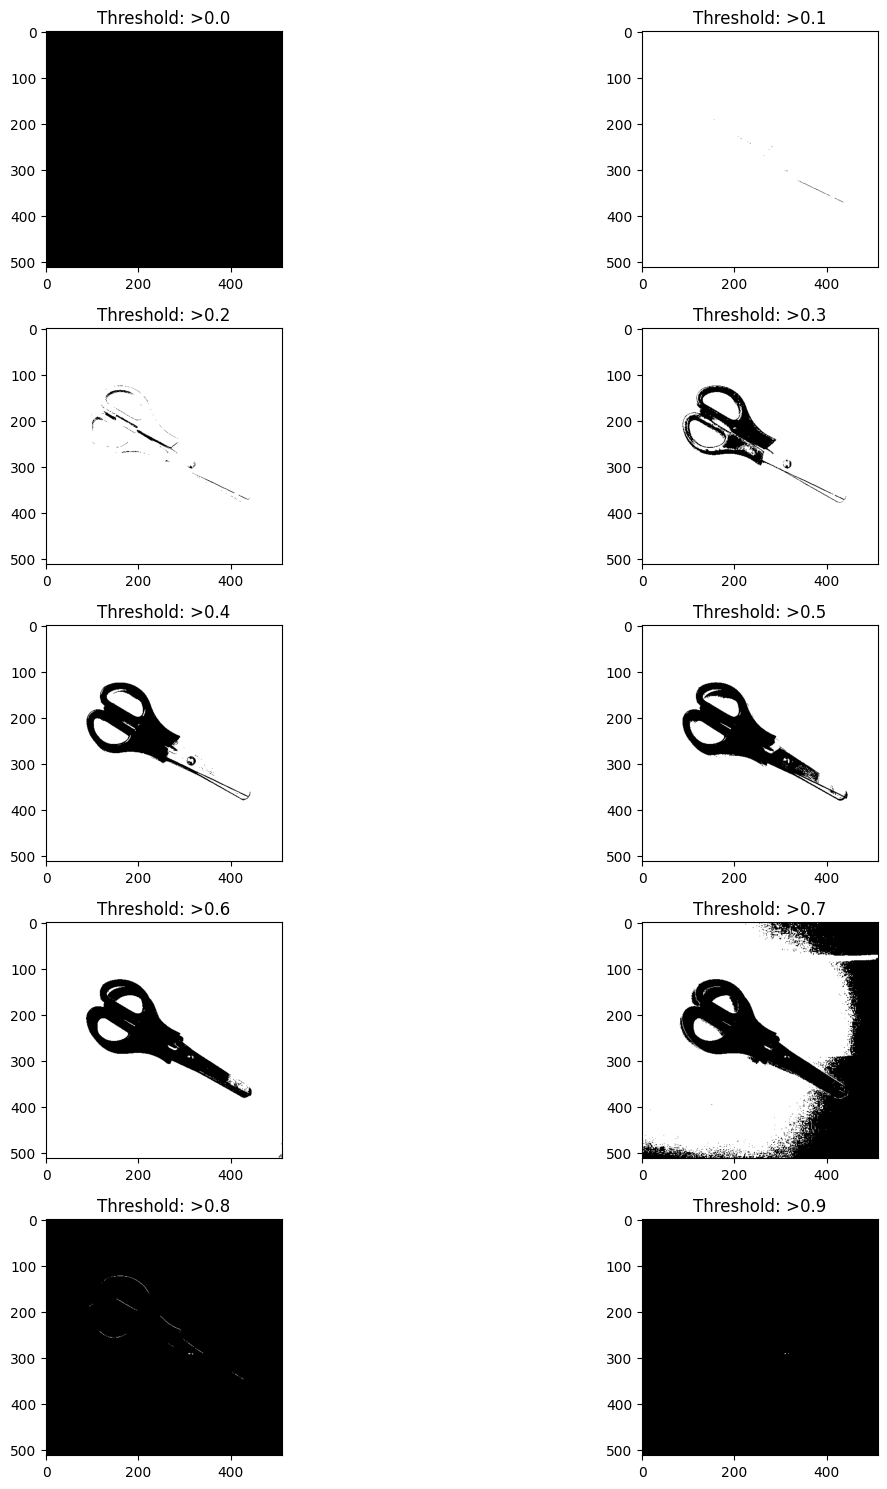

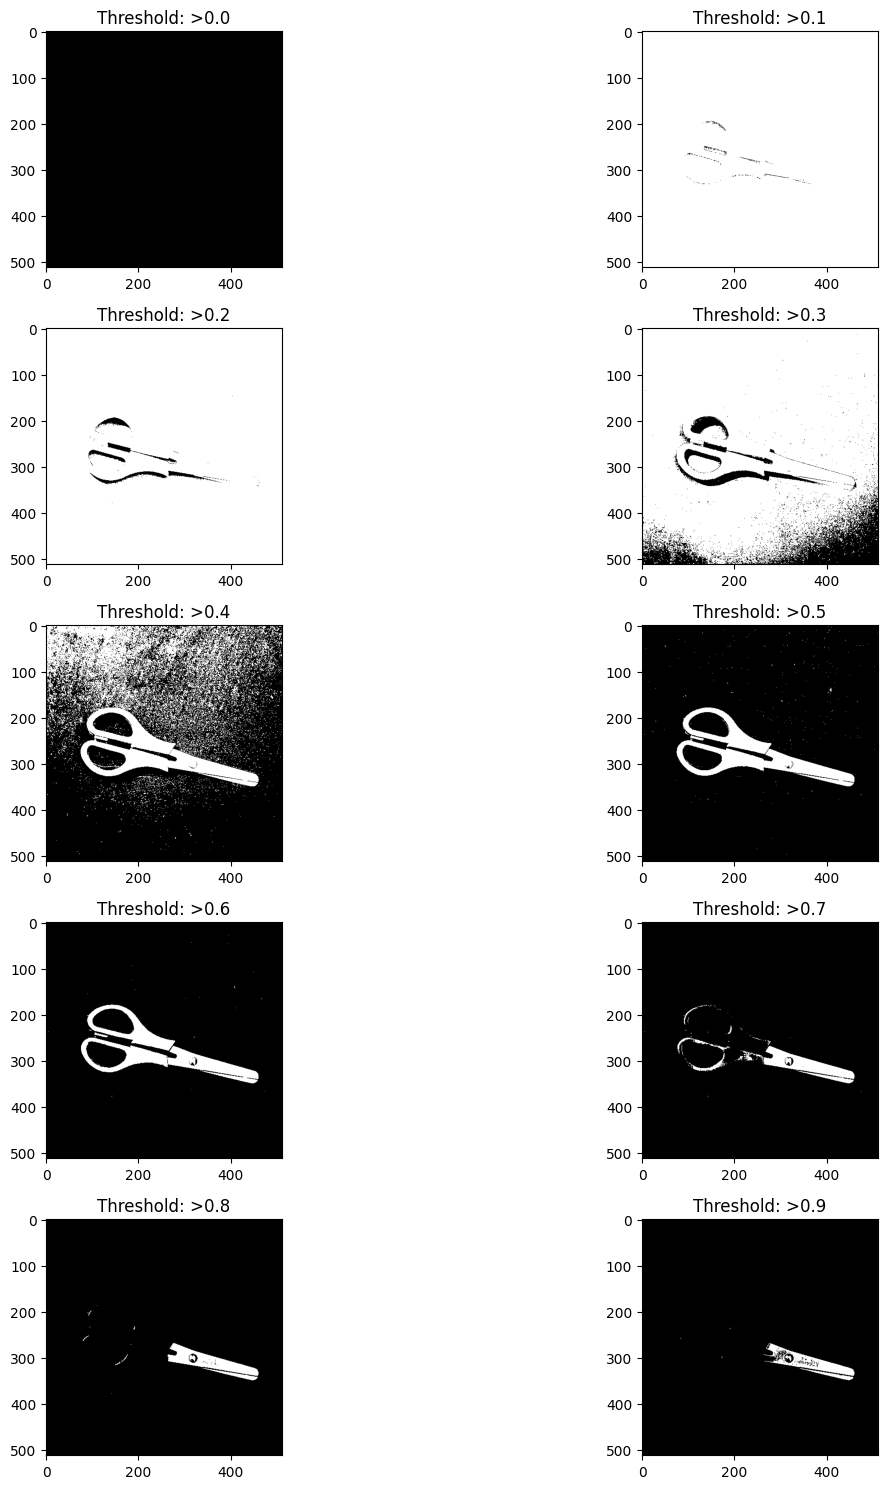

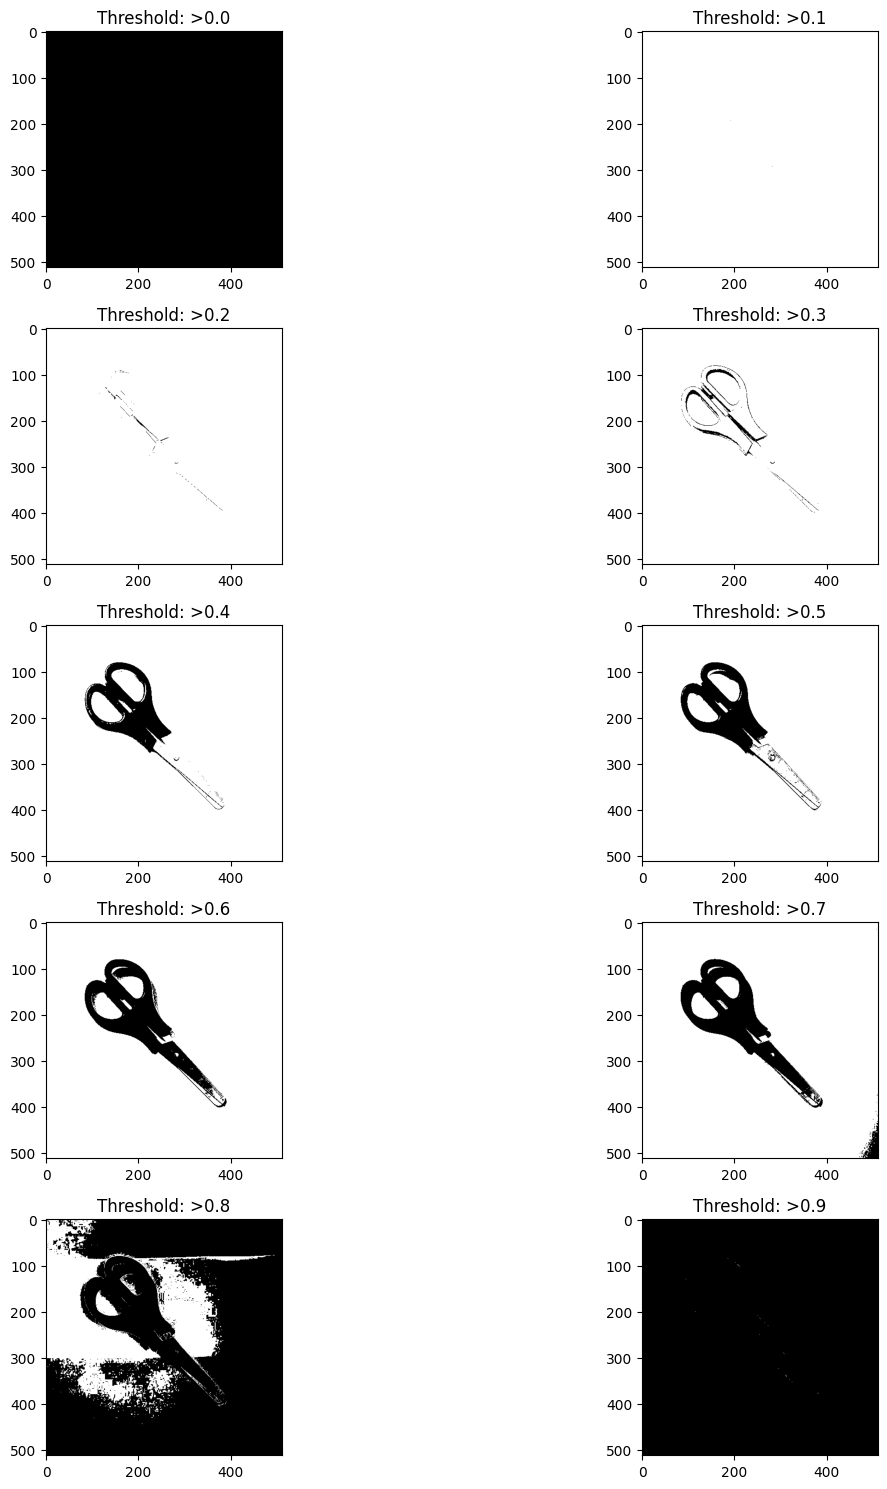

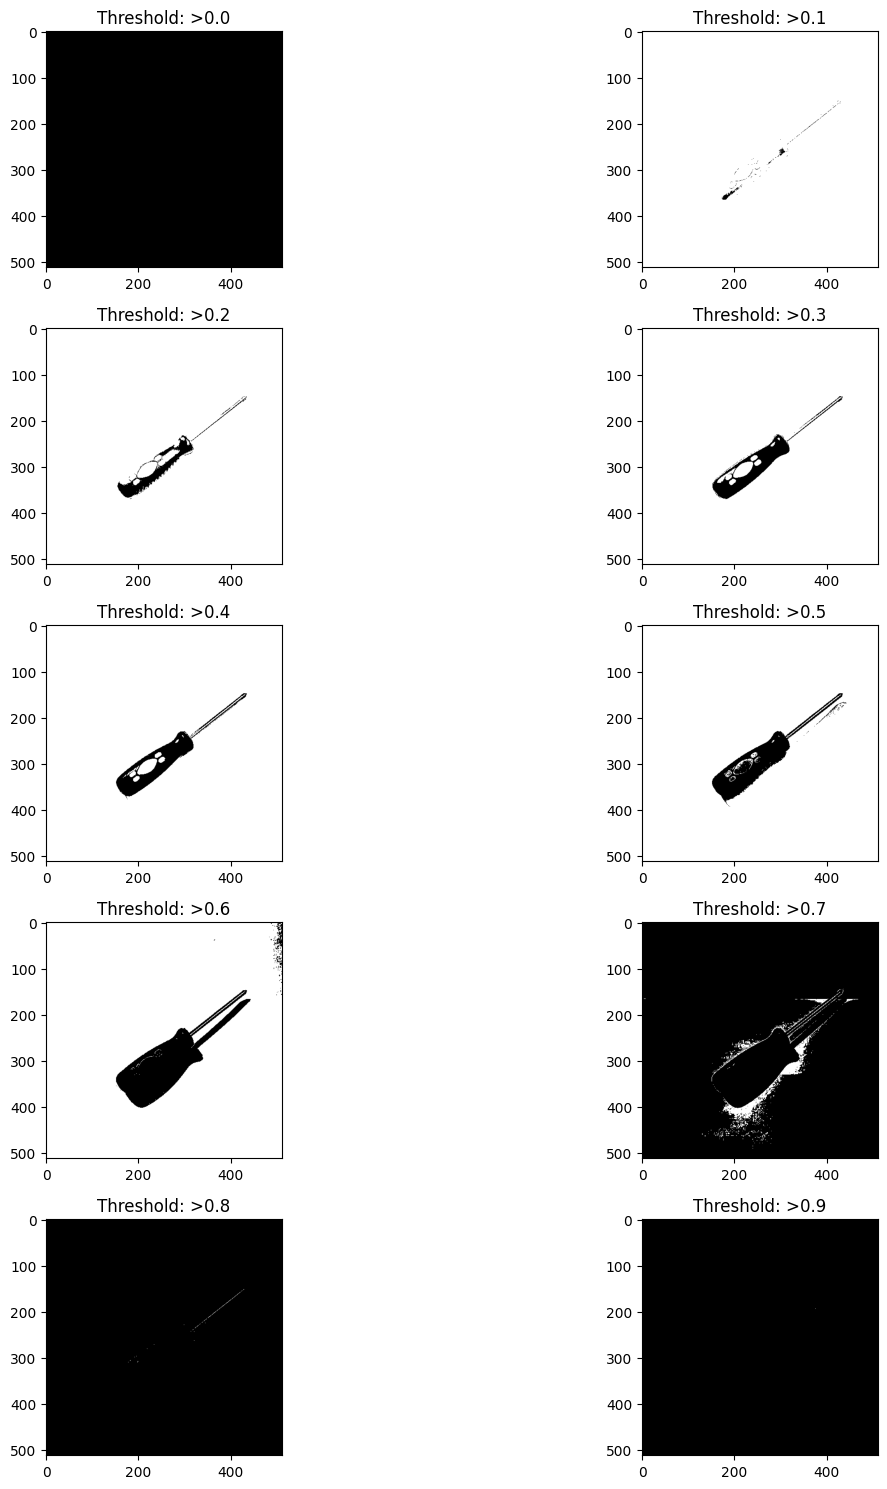

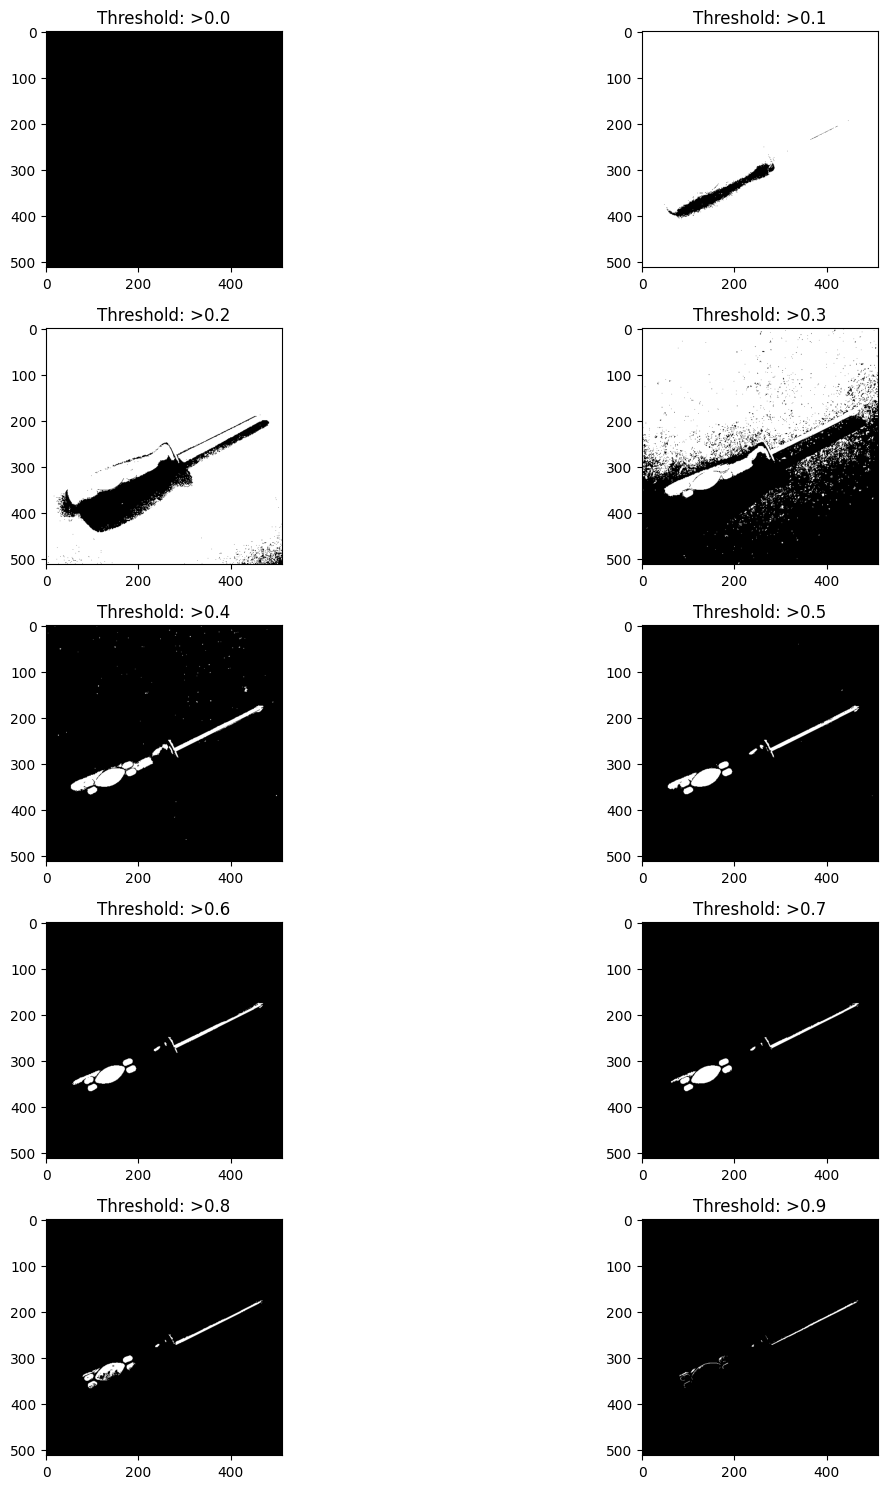

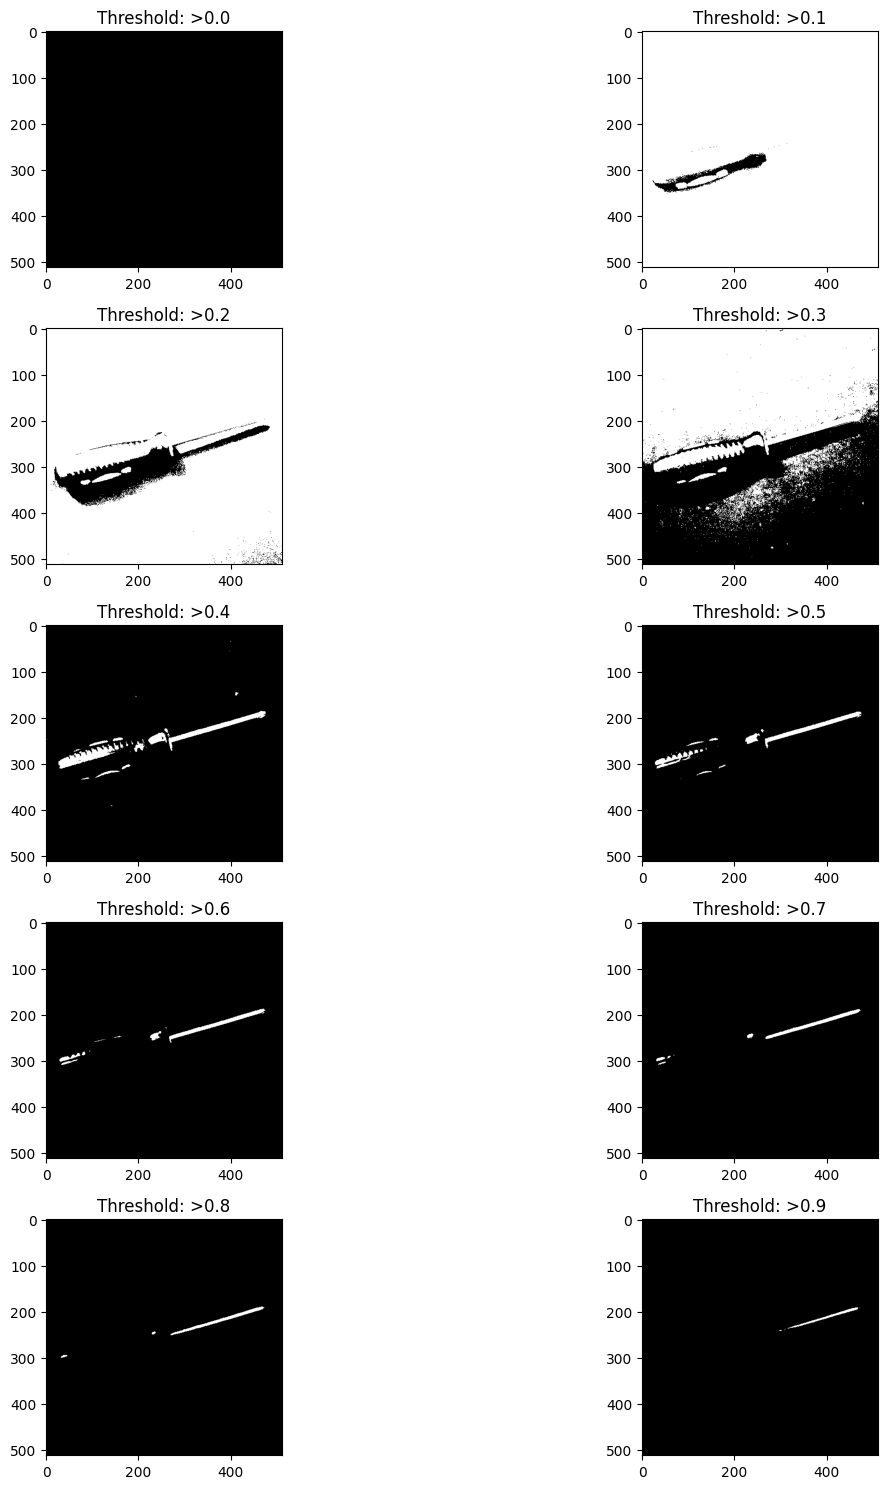

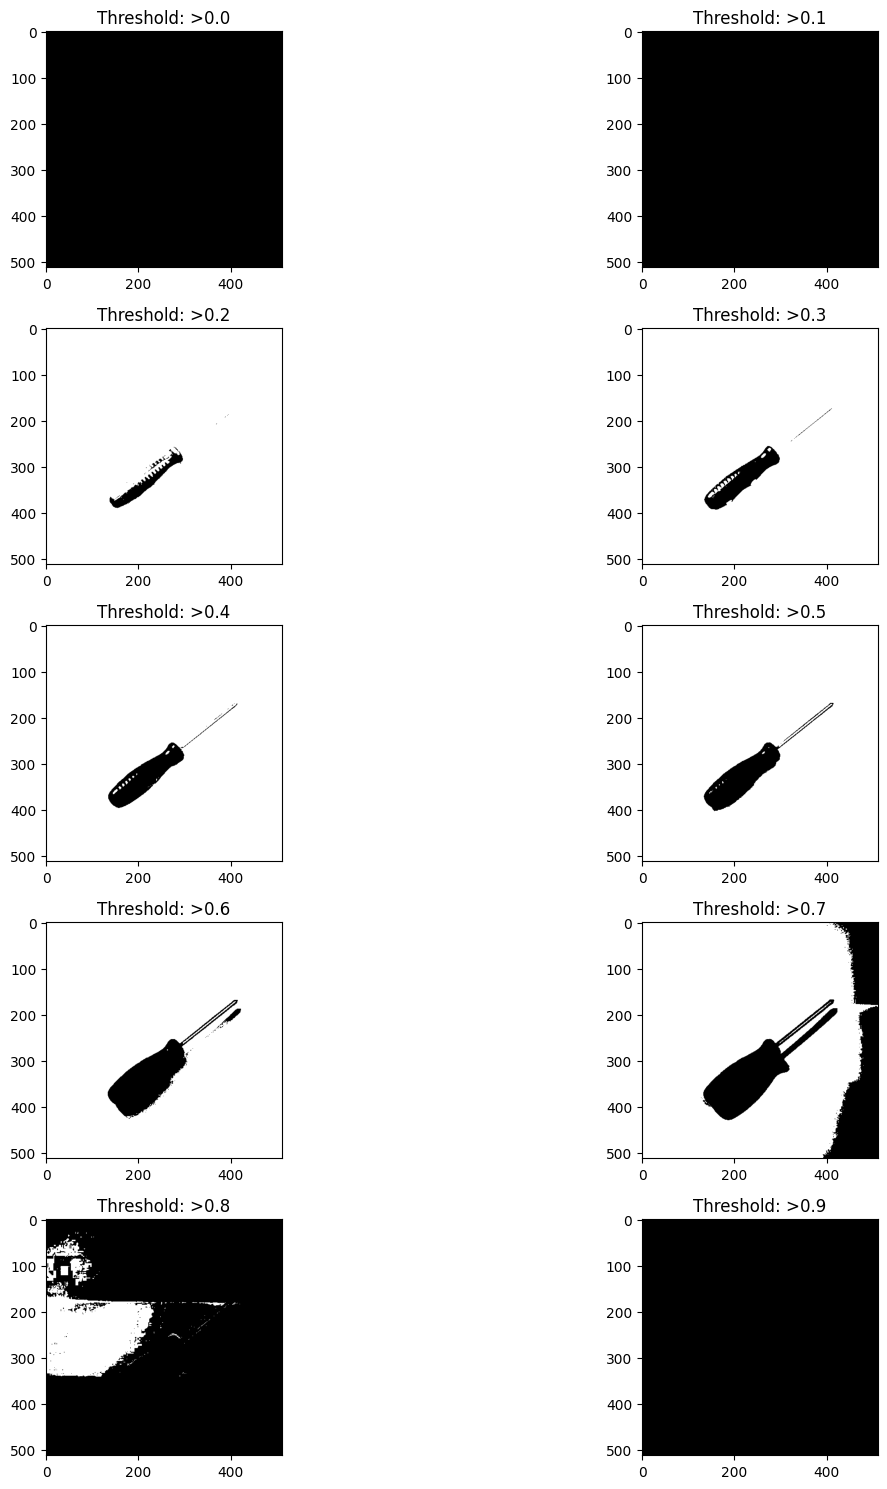

In [18]:
for i in images_loader(DATA_SET_PATH):
  for j in i["images"]:
    threshold_test(j["image"])